<a href="https://colab.research.google.com/github/makarandmadhavi/Model-Interpretability-Marketting-Campaign/blob/main/Model_Interpretability_Marketting_Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Interpretability Marketting Campaign

Interpret your models.

1. Fit a linear model and interpret the regression coefficients

2. Fit a tree-based model and interpret the nodes

3.  Use auto ml to find the best model

4. Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.

 

Grading:  80% if meet the above requirements

Up to 20% for presentation and expanation.


## About Dataset - Marketing Campaign

Dataset Link - https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign

**Context**
A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service

**Content**

1. AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
2. AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
3. AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
4. AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
5. AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
6. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
7. Complain - 1 if customer complained in the last 2 years
8. DtCustomer - date of customer’s enrolment with the company
9. Education - customer’s level of education
10. Marital - customer’s marital status
11. Kidhome - number of small children in customer’s household
12. Teenhome - number of teenagers in customer’s household
13. Income - customer’s yearly household income
14. MntFishProducts - amount spent on fish products in the last 2 years
15. MntMeatProducts - amount spent on meat products in the last 2 years
16. MntFruits - amount spent on fruits products in the last 2 years
17. MntSweetProducts - amount spent on sweet products in the last 2 years
18. MntWines - amount spent on wine products in the last 2 years
19. MntGoldProds - amount spent on gold products in the last 2 years
20. NumDealsPurchases - number of purchases made with discount
21. NumCatalogPurchases - number of purchases made using catalogue
22. NumStorePurchases - number of purchases made directly in stores
23. NumWebPurchases - number of purchases made through company’s web site
24. NumWebVisitsMonth - number of visits to company’s web site in the last month
25. Recency - number of days since the last purchase

In [78]:
!pip install h2o

libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file


In [79]:
!pip install graphviz

libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file


In [80]:
!pip install shap

libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file


In [81]:
#Importing required packages
import h2o
from h2o.automl import H2OAutoML
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.ensemble import RandomForestRegressor
pd.options.display.max_columns = None

In [82]:
data = pd.read_csv("https://raw.githubusercontent.com/makarandmadhavi/ML-Data-Cleaning-and-Feature-Selection/main/marketing_campaign.csv", sep=";")
data.drop(columns = ["Z_CostContact","Z_Revenue","ID",],inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

# EDA Data Cleaning and feature engineering


In [83]:

data.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0             0         0         1  
1             0             0             0             0         0         0  
2             0             0             0             0         0         0  
3             0             0             0             0         0         0  
4             0             0             0             0         0         0

In [84]:
data['Income'].fillna(data.groupby('Education')['Income'].transform('mean'), inplace = True)
data['Year_Birth'] = data['Year_Birth'].apply(lambda x: 2020-x)
data = data.rename(columns={'Year_Birth': 'Age'})

Education_map = {'Basic':1,
            'Graduation':2,
            'Master':3,
            '2n Cycle':3,
            'PhD':4}
# Create the mapped values in a new column
data['Education'] = data['Education'].map(Education_map)

from datetime import datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%Y-%m-%d')
data['Dt_Customer'] = (datetime(2020,1,1) - data['Dt_Customer']).dt.days

data['Children'] = data['Kidhome'] + data['Teenhome']
data.drop(columns = ["Kidhome","Teenhome"],inplace = True)

data['AmountSpent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data.drop(columns = ["MntWines",	"MntFruits"	,"MntMeatProducts",	"MntFishProducts","MntSweetProducts",	"MntGoldProds"],inplace = True)

data['NumPurchased'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']
data.drop(columns = ["NumWebPurchases",	"NumCatalogPurchases",	"NumStorePurchases"],inplace = True)

data['Prev_campaigns'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']
data.drop(columns = ["AcceptedCmp3",	"AcceptedCmp4",	"AcceptedCmp5",	"AcceptedCmp1",	"AcceptedCmp2"],inplace = True)

maratial_map = {'Married':"Couple",
            'Together':"Couple",
            'Single':'Single',
            'Divorced':'Single',
            'Widow':'Single',
            'Alone':'Single',
            'Absurd':'Single',
            'YOLO':'Single'}
# Create the mapped values in a new column
data['Marital_Status'] = data['Marital_Status'].map(maratial_map)

dummy_status = pd.get_dummies(data['Marital_Status'], prefix='Marital_Status')

data = pd.concat([data, dummy_status], axis=1)
data.drop(['Marital_Status'], axis=1, inplace=True)
data.drop(['Marital_Status_Single'], axis=1, inplace=True)


data.head()

Age  Education   Income  Dt_Customer  Recency  NumDealsPurchases  \
0   63          2  58138.0         2675       58                  3   
1   66          2  46344.0         2125       38                  2   
2   55          2  71613.0         2324       26                  1   
3   36          2  26646.0         2151       26                  2   
4   39          4  58293.0         2173       94                  5   

   NumWebVisitsMonth  Complain  Response  Children  AmountSpent  NumPurchased  \
0                  7         0         1         0         1617            22   
1                  5         0         0         2           27             4   
2                  4         0         0         0          776            20   
3                  6         0         0         1           53             6   
4                  5         0         0         1          422            14   

   Prev_campaigns  Marital_Status_Couple  
0               0                      0  
1               0                      0  
2               0                      1  
3               0                      1  
4               0                      1

In [85]:
data.Income.quantile(0.99)

94437.68000000001

In [86]:
data.drop(data[data['Income'] >= 94437].index, inplace = True)


In [87]:
data.isnull().sum()


Age                      0
Education                0
Income                   0
Dt_Customer              0
Recency                  0
NumDealsPurchases        0
NumWebVisitsMonth        0
Complain                 0
Response                 0
Children                 0
AmountSpent              0
NumPurchased             0
Prev_campaigns           0
Marital_Status_Couple    0
dtype: int64

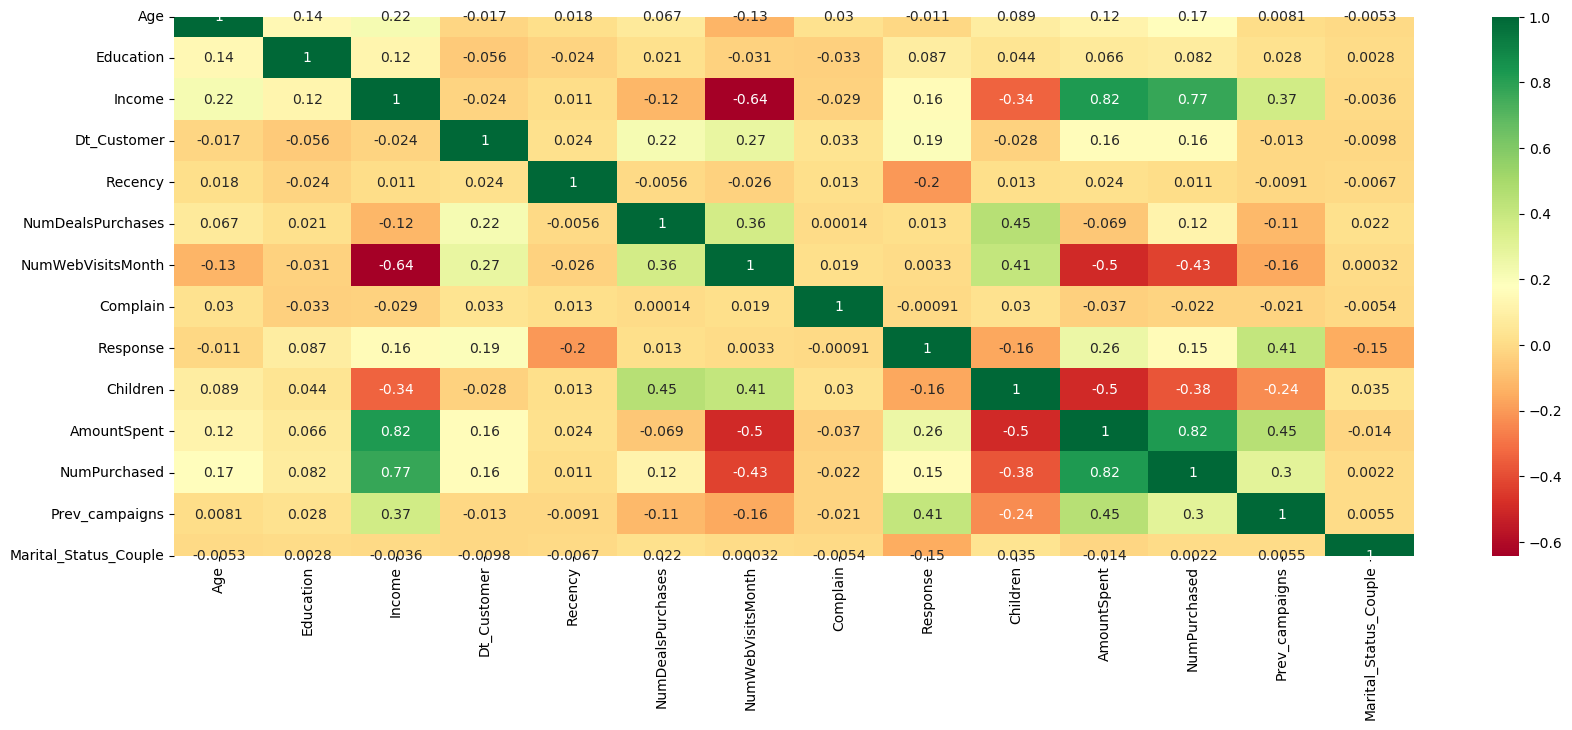

In [88]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

# Logistic Regression ( Linear model )

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [90]:
y=data['Response']#specify the dependent variable and independent variable
x=data.drop(['Response'],axis=1)
x.head()

Age  Education   Income  Dt_Customer  Recency  NumDealsPurchases  \
0   63          2  58138.0         2675       58                  3   
1   66          2  46344.0         2125       38                  2   
2   55          2  71613.0         2324       26                  1   
3   36          2  26646.0         2151       26                  2   
4   39          4  58293.0         2173       94                  5   

   NumWebVisitsMonth  Complain  Children  AmountSpent  NumPurchased  \
0                  7         0         0         1617            22   
1                  5         0         2           27             4   
2                  4         0         0          776            20   
3                  6         0         1           53             6   
4                  5         0         1          422            14   

   Prev_campaigns  Marital_Status_Couple  
0               0                      0  
1               0                      0  
2               0                      1  
3               0                      1  
4               0                      1

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)#divide the train ,test group
x_train.head()

Age  Education   Income  Dt_Customer  Recency  NumDealsPurchases  \
211    66          2  77972.0         2115       18                  1   
2052   61          2  76320.0         2019       49                  2   
1374   51          4  56242.0         2495       72                  5   
1266   57          4  53378.0         2655       41                 10   
1746   73          1  28389.0         2598       49                  1   

      NumWebVisitsMonth  Complain  Children  AmountSpent  NumPurchased  \
211                   1         0         0         1101            19   
2052                  2         0         1          932            13   
1374                  6         0         1          971            23   
1266                  8         0         2          793            19   
1746                  7         0         0           28             3   

      Prev_campaigns  Marital_Status_Couple  
211                0                      1  
2052               0                      0  
1374               0                      1  
1266               0                      1  
1746               0                      1

In [92]:
logreg=LogisticRegression()
loggreg_final=logreg.fit(x_train,y_train)
print(loggreg_final.score(x_train,y_train))

0.8573040045121263


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [93]:
y_pred=logreg.predict(x_test)

cm=confusion_matrix(y_test, y_pred)#confusion matrix for the logistic model prediction
print(cm)

[[380   9]
 [ 44  11]]


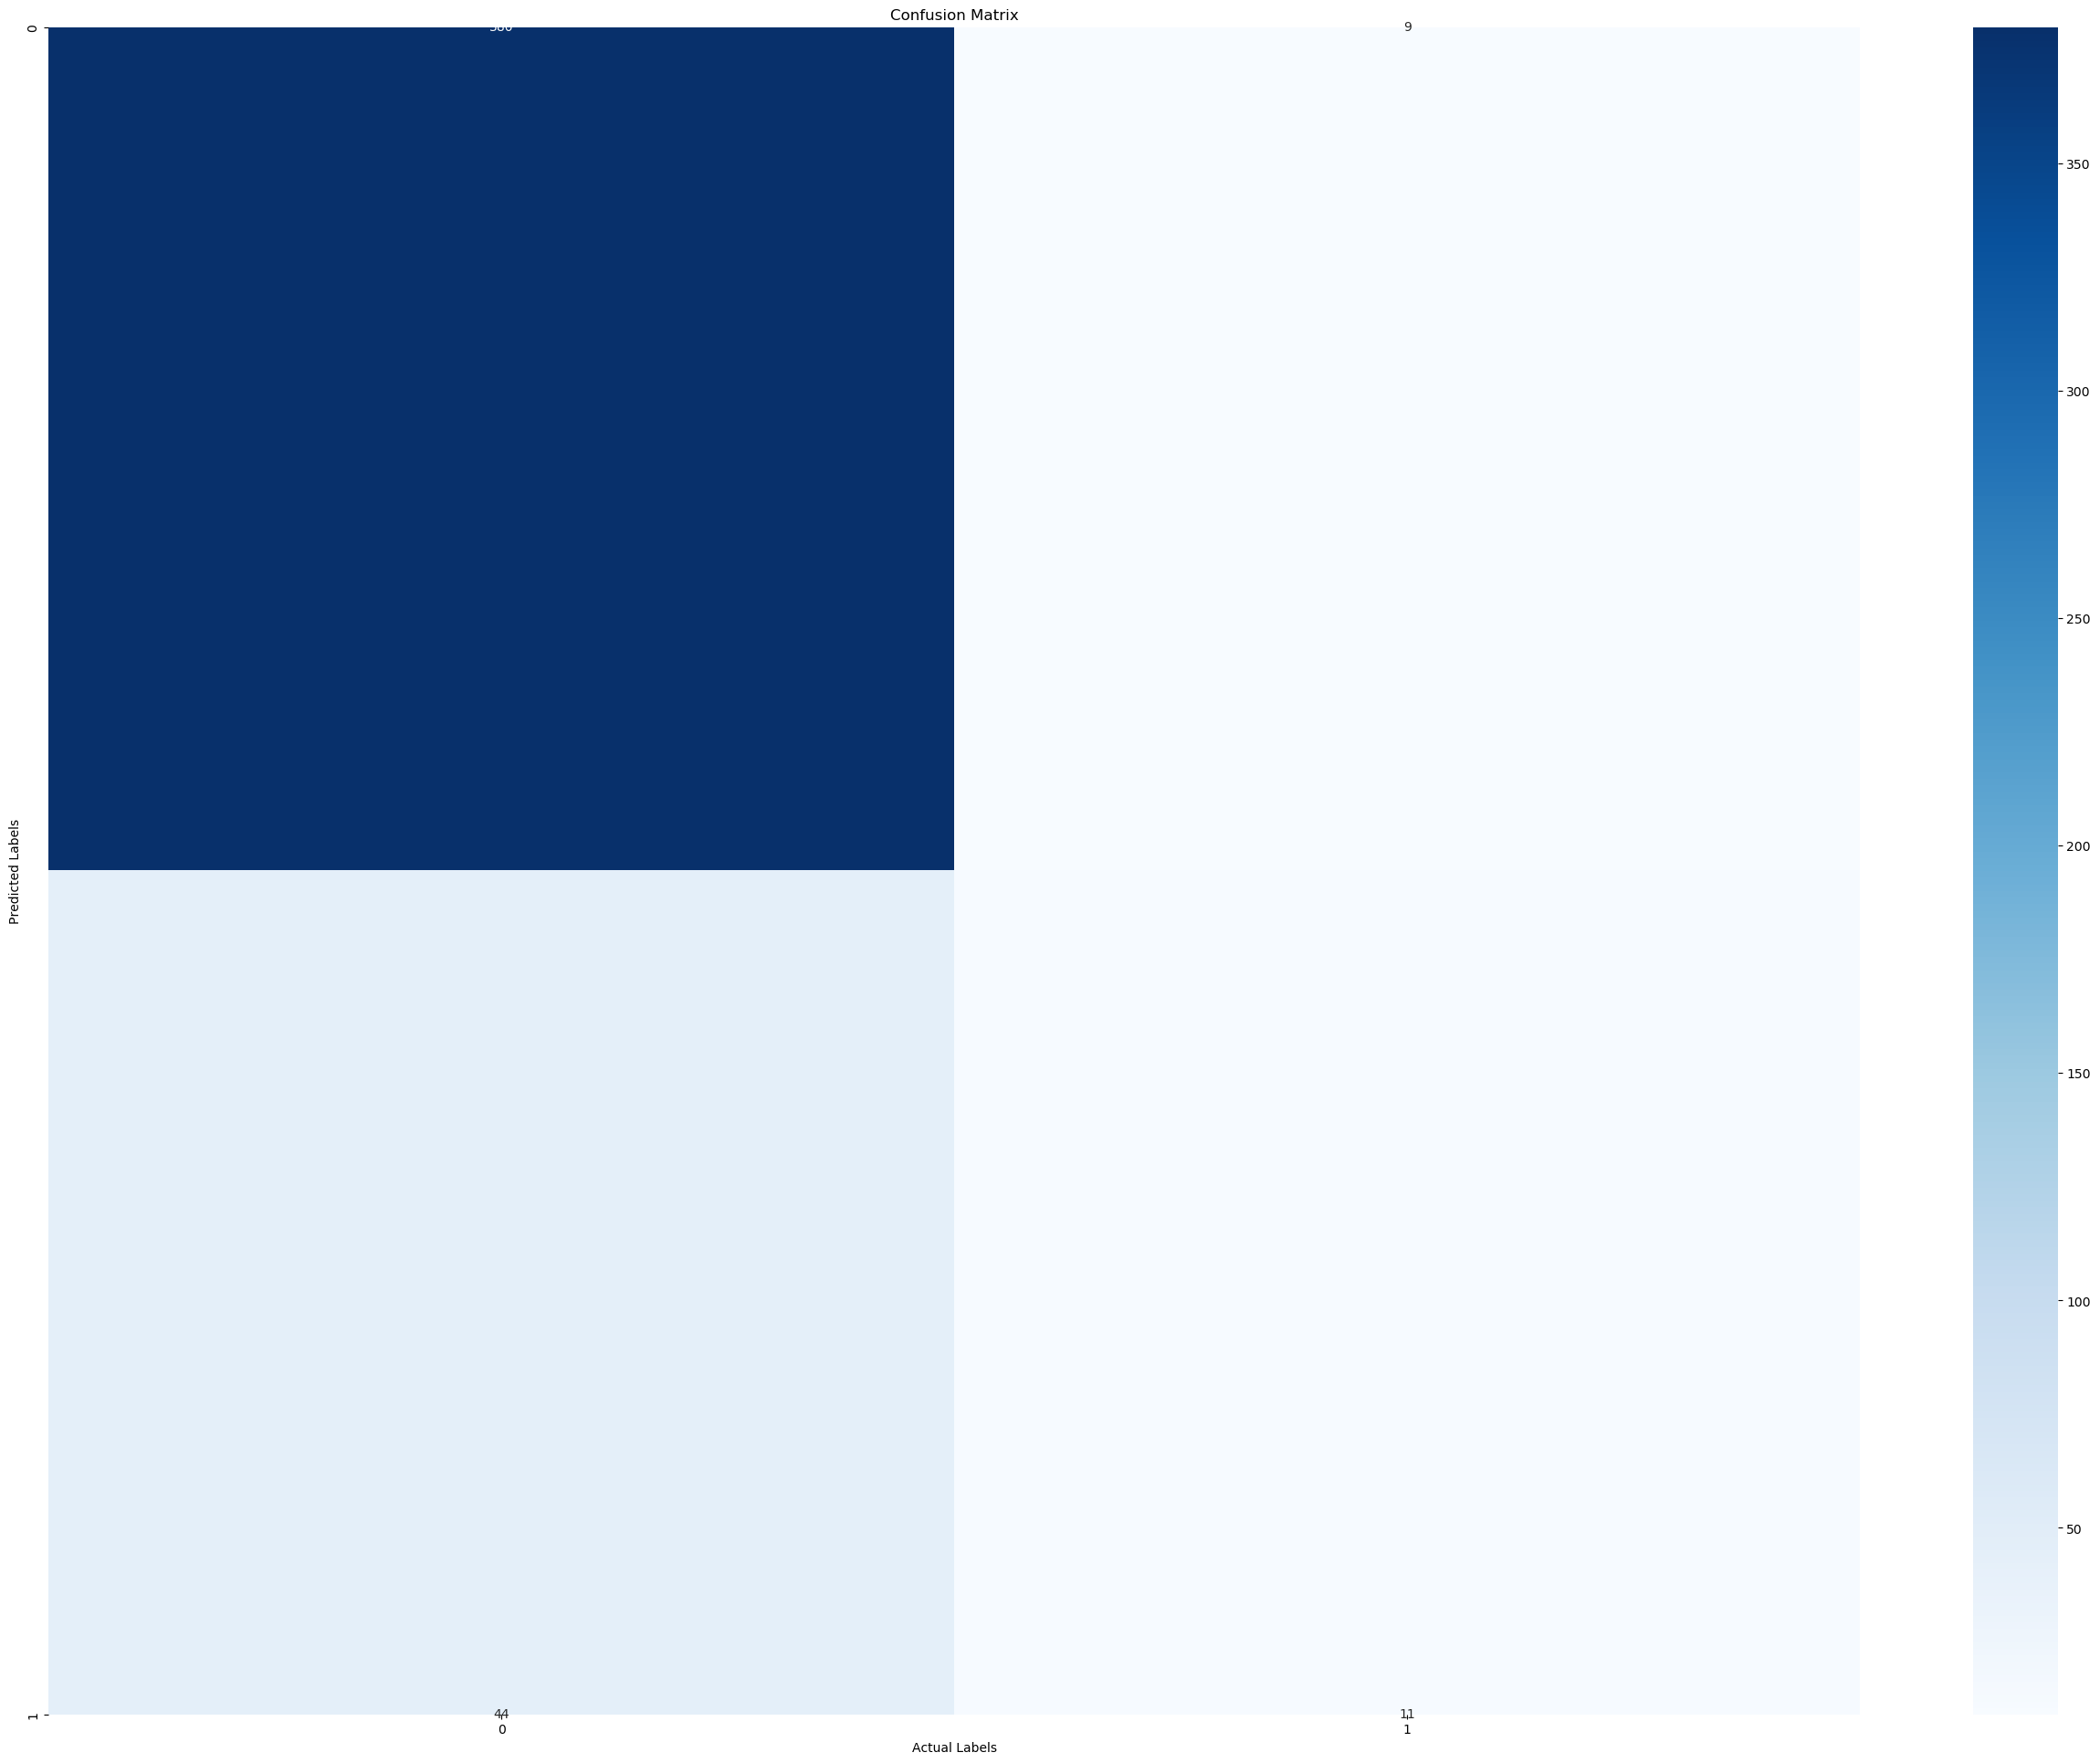

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.show()


In [95]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['Response'], data[["Age",	"Education",	"Income",	"Dt_Customer",	
                                       "Recency"	,"NumDealsPurchases",	"NumWebVisitsMonth",	
                                       "Complain",	"Children",	"AmountSpent"	,"NumPurchased",	
                                       "Prev_campaigns",	"Marital_Status_Couple"]]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Response   R-squared (uncentered):                   0.386
Model:                            OLS   Adj. R-squared (uncentered):              0.382
Method:                 Least Squares   F-statistic:                              106.6
Date:                Wed, 29 Mar 2023   Prob (F-statistic):                   3.50e-222
Time:                        20:32:36   Log-Likelihood:                         -473.21
No. Observations:                2217   AIC:                                      972.4
Df Residuals:                    2204   BIC:                                      1047.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Age                      -0.0009      0.001     -1.672      0.095      -0.002       0.000
Education                 0.0283      0.008      3.710      0.000       0.013       0.043
Income                -1.245e-06   6.66e-07     -1.870      0.062   -2.55e-06    6.05e-08
Dt_Customer               0.0001   1.92e-05      6.866      0.000    9.43e-05       0.000
Recency                  -0.0026      0.000    -11.710      0.000      -0.003      -0.002
NumDealsPurchases         0.0155      0.004      3.517      0.000       0.007       0.024
NumWebVisitsMonth         0.0047      0.004      1.175      0.240      -0.003       0.013
Complain                  0.0511      0.066      0.774      0.439      -0.078       0.181
Children                 -0.0428      0.012     -3.584      0.000      -0.066      -0.019
AmountSpent               0.0001   2.45e-05      5.335      0.000    8.26e-05       0.000
NumPurchased             -0.0065      0.002     -3.591      0.000      -0.010      -0.003
Prev_campaigns            0.1945      0.011     17.454      0.000       0.173       0.216
Marital_Status_Couple    -0.1165      0.013     -8.768      0.000      -0.143      -0.090
==============================================================================
Omnibus:                      537.661   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1111.189
Skew:                           1.413   Prob(JB):                    5.11e-242
Kurtosis:                       5.011   Cond. No.                     5.72e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Interpretting the Regression Coefficients

The coefficients of the independent variables in the regression model represent the change in the dependent variable for a one-unit increase in the corresponding independent variable, holding all other independent variables constant.

1. The coefficient for "Age" is -0.0013. This means that for every one unit increase in age, the dependent variable (Response) is expected to decrease by 0.0013, holding all other variables constant.

2. The coefficient for "Education" is 0.0266. This means that for every one unit increase in education, the dependent variable is expected to increase by 0.0266, holding all other variables constant.

3. The coefficient for "Income" is -5.288e-07. This means that for every one unit increase in income, the dependent variable is expected to decrease by 5.288e-07, holding all other variables constant. However, the p-value associated with this coefficient is 0.149, which is greater than the commonly used threshold of 0.05, indicating that this coefficient may not be statistically significant.

4. The coefficient for "Complain" is 0.0514, but the p-value associated with this coefficient is 0.438, which is greater than 0.05, indicating that this variable may not be statistically significant in the model.

5. The coefficients for "Recency", "Children", "AmountSpent", "NumPurchased", "Prev_campaigns", and "Marital_Status_Couple" all have p-values less than 0.05, indicating that they are statistically significant in the model.

It is important to note that the coefficients should be interpreted with caution, as the presence of multicollinearity or other numerical problems can affect their validity. Therefore, it is recommended to further investigate the model to ensure the robustness of the results.

The adjusted R-squared value is 0.391, which means that about 39.1% of the variability in the response variable can be explained by the independent variables in the model. The F-statistic is 111.8, and the p-value associated with it is very low (1.18e-231), which suggests that at least one of the independent variables is significantly related to the response variable.

The coefficients of the independent variables represent the amount of change in the dependent variable for a one-unit increase in the corresponding independent variable, holding all other independent variables constant. The p-value associated with each coefficient represents the statistical significance of that variable, i.e., whether or not the variable is significantly related to the response variable.

The model does not contain a constant, as indicated by the note [1], which means that the intercept is zero. The note [2] indicates that the standard errors assume that the covariance matrix of the errors is correctly specified.

The large condition number (6.03e+05) mentioned in note [3] suggests that there may be strong multicollinearity or other numerical problems in the model. This should be further investigated to ensure the validity of the results.

Overall, the model appears to be a good fit for the data, but further analysis is needed to assess the robustness of the results.



# Decision Tree (Tree based model)


Accuracy Score: 0.8378378378378378
Confusion Matrix:
[[347  42]
 [ 30  25]]

Decision Tree:



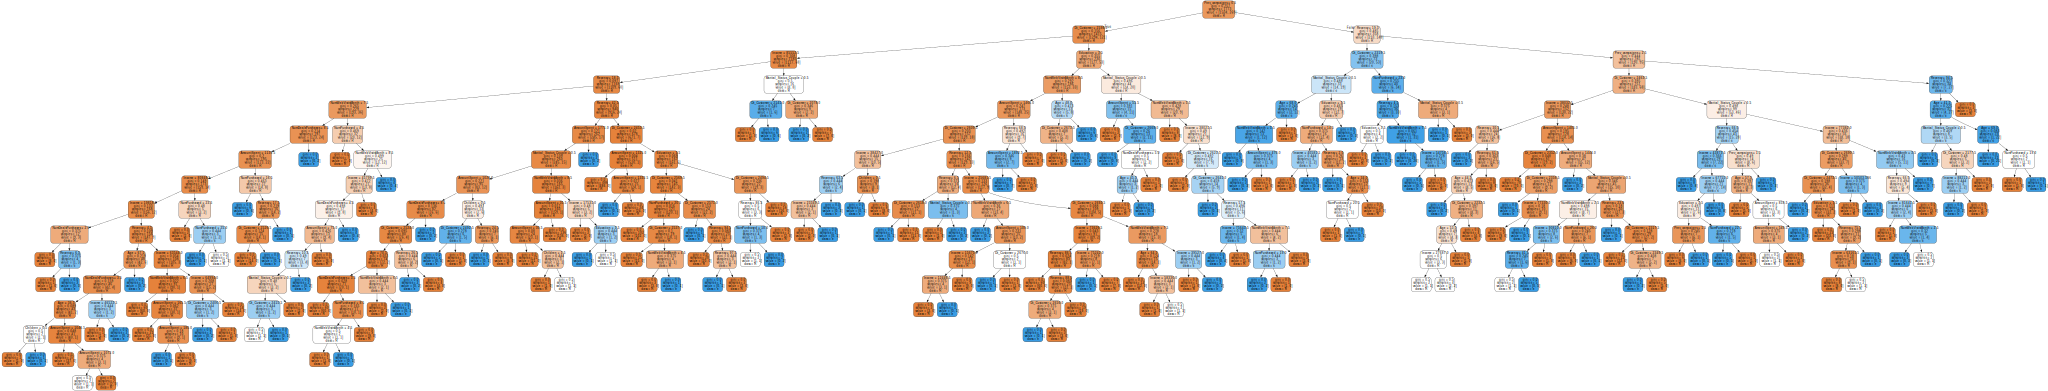

In [96]:
# Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import graphviz

# Create a decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)

# Train the decision tree classifier on the training set
dtc.fit(x_train, y_train)

# Use the decision tree classifier to make predictions on the testing set
y_pred = dtc.predict(x_test)

# Calculate accuracy score and confusion matrix
acc_score = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

# Print the accuracy score and confusion matrix
print("Accuracy Score: {}".format(acc_score))
print("Confusion Matrix:\n{}".format(conf_mat))

# Visualize the decision tree using graphviz
dot_data = export_graphviz(dtc, out_file=None, feature_names=x_train.columns, class_names=y_train.name, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("breast_cancer_decision_tree")

# Print the decision tree
print("\nDecision Tree:\n")
graph = graphviz.Source(dot_data)
graph


## Interpretting the tree

The Gini value, also known as the Gini index or Gini impurity, is a measure of the impurity or randomness of a set of data, often used in decision trees. In decision trees, the Gini value is used to determine the optimal split at each node based on the purity of the data subsets resulting from the split.

The Gini value ranges from 0 to 1, with 0 indicating perfect purity (all data belongs to the same class) and 1 indicating perfect impurity (data is evenly distributed among all classes). In decision trees, the Gini value is calculated for each potential split, and the split with the lowest Gini value is chosen as the optimal split.

In practice, the Gini value is often used in conjunction with other measures of impurity, such as entropy, to help build more accurate decision trees.

As we have a problem og binary classification the model a split decision at every node depending on the given parameter value.

In [97]:

# Get numerical feature importances
tree_importances = list(dtc.feature_importances_)
# List of tuples with variable and importance
feature_importances = [
    (feature, round(importance, 2))
    for feature, importance in zip(x_train.columns, tree_importances)
]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

In [98]:

# Print out the feature and importances
[print("Variable: {:20} Importance: {}".format(*pair)) for pair in feature_importances];

Variable: Prev_campaigns       Importance: 0.19
Variable: Dt_Customer          Importance: 0.16
Variable: Recency              Importance: 0.16
Variable: Income               Importance: 0.12
Variable: AmountSpent          Importance: 0.08
Variable: NumWebVisitsMonth    Importance: 0.07
Variable: Marital_Status_Couple Importance: 0.06
Variable: NumPurchased         Importance: 0.05
Variable: Age                  Importance: 0.04
Variable: NumDealsPurchases    Importance: 0.04
Variable: Education            Importance: 0.03
Variable: Children             Importance: 0.01
Variable: Complain             Importance: 0.0


## Interpretting variable importance

The feature importance shows Prev_campaign, Dt_Customer, Recency and Income have a high significance similar to the linear model

# Auto ML

In [99]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  --------------------------------------
H2O_cluster_uptime:         7 days 5 hours 6 mins
H2O_cluster_timezone:       America/New_York
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.1
H2O_cluster_version_age:    1 month and 21 days
H2O_cluster_name:           H2O_from_python_makarandmadhavi_qzjua0
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.500 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.9.12 final
--------------------------  --------------------------------------

In [100]:
df = h2o.H2OFrame(data)
df["Response"] = df["Response"].asfactor()
df.describe(chunk_summary=True)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:2217
Cols:14

Chunk compression summary: 
chunk_type    chunk_name                 count    count_percentage    size     size_percentage
------------  -------------------------  -------  ------------------  -------  -----------------
CBS           Binary                     2        14.2857             696  B   1.51627
CXI           Sparse Integers            1        7.14286             118  B   0.257069
C1N           1-Byte Integers (w/o NAs)  8        57.1429             17.9 KB  39.824
C2            2-Byte Integers            2        14.2857             8.8 KB   19.6157
C8D           64-bit Reals               1        7.14286             17.4 KB  38.787

Frame distribution summary: 
                 size     number_of_rows    number_of_chunks_per_column    number_of_chunks
---------------  -------  ----------------  -----------------------------  ------------------
127.0.0.1:54321  44.8 KB  2217              1                              14
mean             44.8 KB  2217              1                              14
min              44.8 KB  2217              1                              14
max              44.8 KB  2217              1                              14
stddev           0  B     0                 0                              0
total            44.8 KB  2217              1                              14

Age                Education           Income             Dt_Customer         Recency            NumDealsPurchases    NumWebVisitsMonth    Complain              Response    Children            AmountSpent        NumPurchased        Prev_campaigns      Marital_Status_Couple
-------  -----------------  ------------------  -----------------  ------------------  -----------------  -------------------  -------------------  --------------------  ----------  ------------------  -----------------  ------------------  ------------------  -----------------------
type     int                int                 real               int                 int                int                  int                  int                   enum        int                 int                int                 int                 int
mins     24.0               1.0                 1730.0             2012.0              0.0                0.0                  0.0                  0.0                               0.0                 5.0                0.0                 0.0                 0.0
mean     51.22688317546235  2.663509246729812   51324.61926977652  2365.7640956247174  49.17230491655391  2.3306269733874645   5.350924672981507    0.009472259810554804              0.9566982408660358  599.4686513306268  12.479025710419483  0.2873252142534956  0.645466847090663
maxs     127.0              4.0                 94384.0            2711.0              99.0               15.0                 20.0                 1.0                               3.0                 2525.0             32.0                4.0                 1.0
sigma    11.97328701228253  0.8387549593273527  20292.10655022477  202.14067556410893  28.9367711331267   1.8943973099903892   2.4079610557561093   0.09688534513058857               0.7504039318767902  597.240110870126   7.151067007037491   0.6615994453195736  0.478479532763035
zeros    0                  0                   0                  0                   28                 33                   7                    2196                              621                 0                  4                   1768                786
missing  0                  0                   0                  0                   0                  0                    0                    0                     0           0                   0                  0                   0                   0
0        63.0               2.0                 58138.0            2675.0              58.0               3.0                  7.0                  0.0                   1           0.0                 1617.0             22.0                0.0                 0.0
1        66.0               2.0                 46344.0            2125.0              38.0               2.0                  5.0                  0.0                   0           2.0                 27.0               4.0                 0.0                 0.0
2        55.0               2.0                 71613.0            2324.0              26.0               1.0                  4.0                  0.0                   0           0.0                 776.0              20.0                0.0                 1.0
3        36.0               2.0                 26646.0            2151.0              26.0               2.0                  6.0                  0.0                   0           1.0                 53.0               6.0                 0.0                 1.0
4        39.0               4.0                 58293.0            2173.0              94.0               5.0                  5.0                  0.0                   0           1.0                 422.0              14.0                0.0                 1.0
5        53.0               3.0                 62513.0            2305.0              16.0               2.0                  6.0                  0.0                   0           1.0                 716.0              20.0          

In [101]:
train, test, valid = df.split_frame(ratios=[0.7, 0.20], seed=1)

In [102]:
aml = H2OAutoML(max_models=10, balance_classes=True, seed=1)
aml.train(training_frame = train, y = 'Response')

AutoML progress: |
20:32:37.691: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_8_20230329_203237


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       5/5
# GBM base models (used / total)           1/1
# GLM base models (used / total)           1/1
# DeepLearning base models (used / total)  1/1
# DRF base models (used / total)           2/2
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.04621084220224519
RMSE: 0.21496707236747956
LogLoss: 0.16247513339705041
AUC: 0.971928200450619
AUCPR: 0.8632758967137518
Gini: 0.943856400901238
Null degrees of freedom: 1570
Residual degrees of freedom: 1565
Null deviance: 1261.675495959801
Residual deviance: 510.4968691335325
AIC: 522.4968691335325

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36134676841670527
       0     1    Error    Rate
-----  ----  ---  -------  -------------
0      1309  45   0.0332   (45.0/1354.0)
1      43    174  0.1982   (43.0/217.0)
Total  1352  219  0.056    (88.0/1571.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.361347     0.798165  151
max f2                       0.216559     0.843121  208
max f0point5                 0.430889     0.824065  135
max accuracy                 0.430889     0.946531  135
max precision                0.994115     1         0
max recall                   0.0483314    1         325
max specificity              0.994115     1         0
max absolute_mcc             0.430889     0.766233  135
max min_per_class_accuracy   0.22665      0.915066  203
max mean_per_class_accuracy  0.216559     0.917713  208
max tns                      0.994115     1354      0
max fns                      0.994115     216       0
max fps                      0.00050015   1354      399
max tps                      0.0483314    217       325
max tnr                      0.994115     1         0
max fnr                      0.994115     0.995392  0
max fpr                      0.00050015   1         399
max tpr                      0.0483314    1         325

Gains/Lift Table: Avg response rate: 13.81 %, avg score: 14.72 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101846                   0.933953           7.23963   7.23963            1                0.954877    1                           0.954877            0.0737327       0.0737327                  623.963   623.963            0.0737327
2        0.0203692                   0.894127           7.23963   7.23963            1                0.912665    1                           0.933771            0.0737327       0.147465                   623.963   623.963            0.147465
3        0.0305538                   0.855563           6.33468   6.93798            0.875            0.871384    0.958333                    0.912975            0.0645161       0.211982                   533.468   593.798            0.210504
4        0.0401018                   0.794473           7.23963   7.00

In [103]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse
-------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------
StackedEnsemble_BestOfFamily_1_AutoML_8_20230329_203237  0.885963   0.263305  0.600842                0.220167  0.281744  0.0793798
StackedEnsemble_AllModels_1_AutoML_8_20230329_203237     0.884202   0.264258  0.599789                0.215559  0.282185  0.0796285
GBM_1_AutoML_8_20230329_203237                           0.877708   0.278536  0.582157                0.240697  0.291275  0.0848412
GLM_1_AutoML_8_20230329_203237                           0.864508   0.278946  0.572324                0.259691  0.288404  0.0831768
DeepLearning_1_AutoML_8_20230329_203237                  0.860591   0.298413  0.546453                0.21949   0.299879  0.0899275
GBM_3_AutoML_8_20230329_203237                           0.855822   0.322371  0.506239                0.250609  0.311562  0.0970708
DRF_1_AutoML_8_20230329_203237                           0.855072   0.581238  0.497318                0.277651  0.329099  0.108306
GBM_4_AutoML_8_20230329_203237                           0.849875   0.331622  0.494647                0.25851   0.314132  0.0986787
GBM_5_AutoML_8_20230329_203237                           0.847351   0.326679  0.493974                0.270135  0.312611  0.0977258
GBM_2_AutoML_8_20230329_203237                           0.84616    0.32309   0.50938                 0.233845  0.31006   0.0961373
XRT_1_AutoML_8_20230329_203237                           0.846014   0.37124   0.466359                0.248513  0.330679  0.109349
GBM_grid_1_AutoML_8_20230329_203237_model_1              0.832405   0.3442    0.45278                 0.266915  0.321084  0.103095
[12 rows x 7 columns]

In [104]:
#Getting the best model
best_model = h2o.get_model(lb[0,"model_id"])
best_model.model_performance(test)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.08627516251331083
RMSE: 0.2937263394953044
LogLoss: 0.2798191653440633
AUC: 0.9050651769087523
AUCPR: 0.6991137917662684
Gini: 0.8101303538175046
Null degrees of freedom: 432
Residual degrees of freedom: 427
Null deviance: 403.3683590121891
Residual deviance: 242.32339718795876
AIC: 254.32339718795876

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21593509689718593
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      312  46   0.1285   (46.0/358.0)
1      15   60   0.2      (15.0/75.0)
Total  327  106  0.1409   (61.0/433.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.215935     0.662983  101
max f2                       0.123427     0.757919  137
max f0point5                 0.508048     0.708502  39
max accuracy                 0.508048     0.889145  39
max precision                0.970459     1         0
max recall                   0.00220691   1         374
max specificity              0.970459     1         0
max absolute_mcc             0.215935     0.591013  101
max min_per_class_accuracy   0.173086     0.826667  117
max mean_per_class_accuracy  0.123427     0.841918  137
max tns                      0.970459     358       0
max fns                      0.970459     74        0
max fps                      0.000420364  358       399
max tps                      0.00220691   75        374
max tnr                      0.970459     1         0
max fnr                      0.970459     0.986667  0
max fpr                      0.000420364  1         399
max tpr                      0.00220691   1         374

Gains/Lift Table: Avg response rate: 17.32 %, avg score: 15.33 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0115473                   0.886299           5.77333   5.77333            1                0.933851    1                           0.933851            0.0666667       0.0666667                  477.333   477.333            0.0666667
2        0.0207852                   0.86265            4.33      5.13185            0.75             0.877751    0.888889                    0.908918            0.04            0.106667                   333       413.185            0.103873
3        0.0300231                   0.797506           4.33      4.88513            0.75             0.834287    0.846154                    0.885954            0.04            0.146667                   333       388.513            0.14108
4        0.0438799                   0.733526           4.81111   4.86175            0.833333         0.764812    0.842105                    0.847699            0.0666667       0.213333                   381.111   386.175            0.204953
5        0.0508083                   0.668025           3.84889   4.72364            0.666667         0.691931    0.818182                    0.826458            0.0266667       0.24                       284.889   372.364            0.228827
6        0.101617                    0.505785           4.46121   4.59242            0.772727         0.578777    0.795455                    0.702617            0.226667        0.466667                   346.121   359.242            0.441527
7        0.150115                    0.373034           2.19937   3.81928            0.380952         0.424561    0.661538                    0.612784    

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

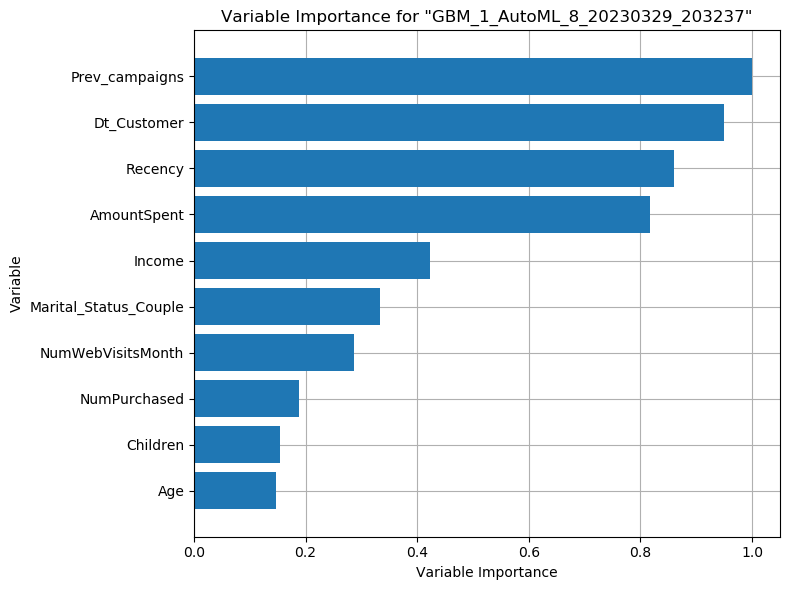

In [105]:
explain_model = aml.explain(frame = test, figsize = (8,6),include_explanations=['varimp'])


## Interpreting Variable Importance

The variable importance graph of best model of autoML shows us thet Prev_campaign is most important feature of the model followed by amount spent and Dt_customer, recency

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

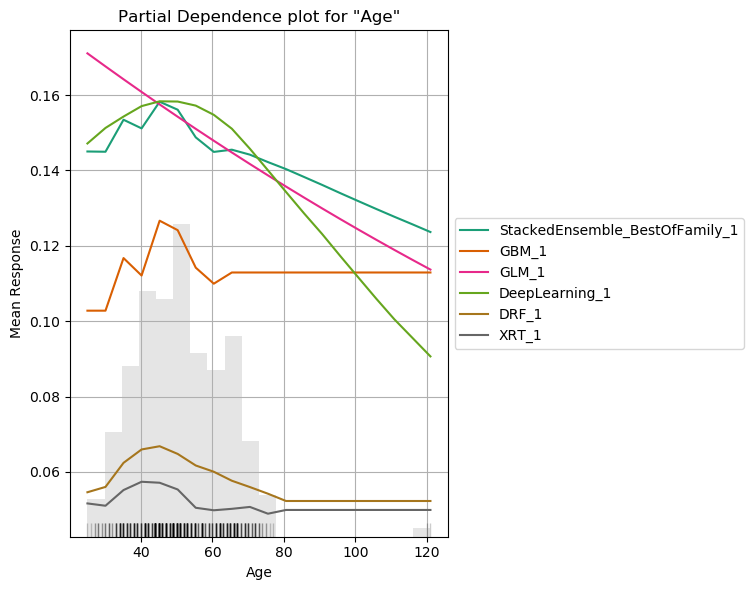

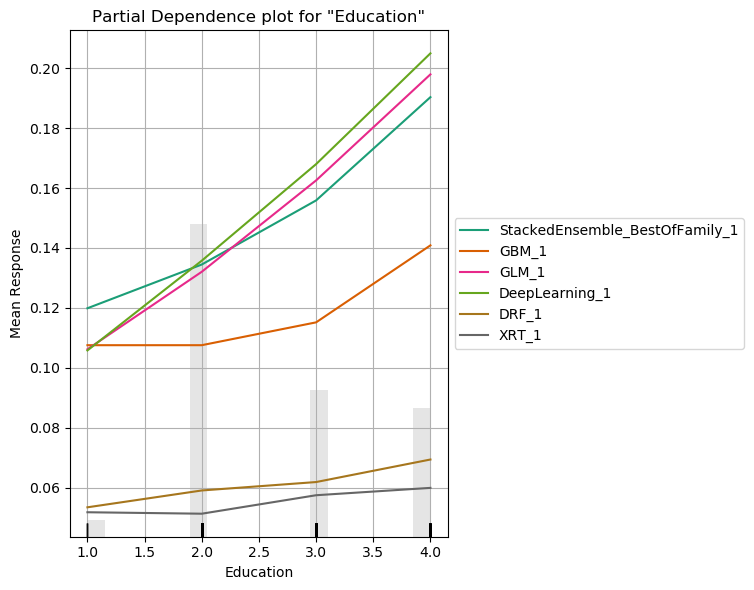

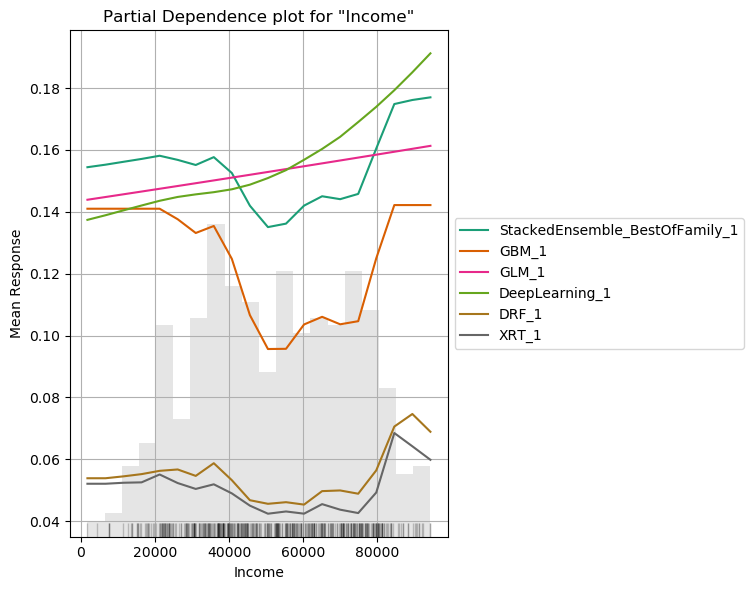

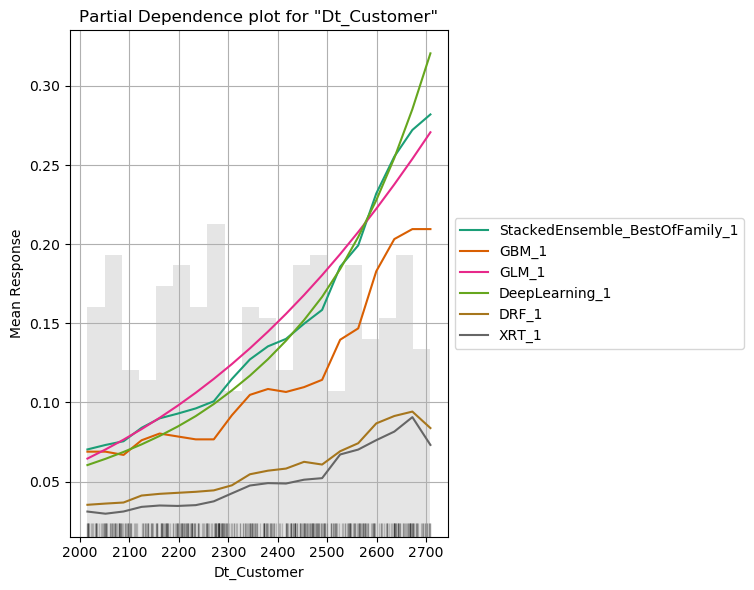

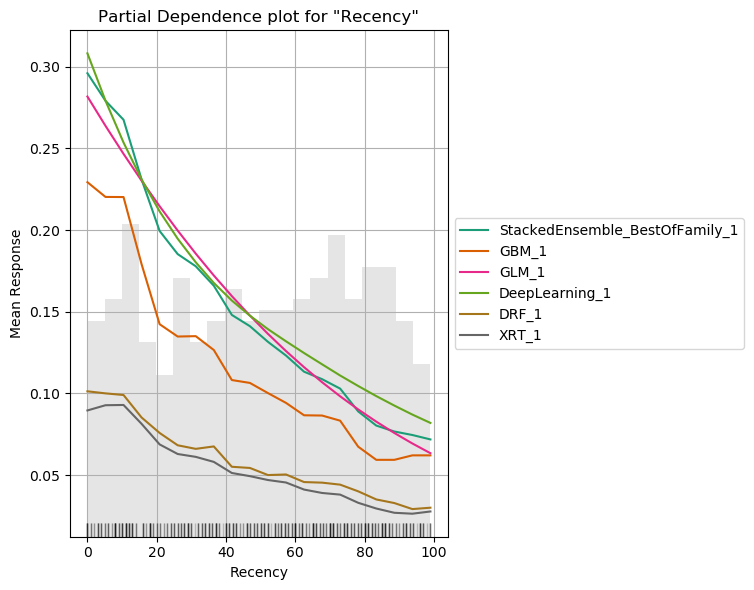

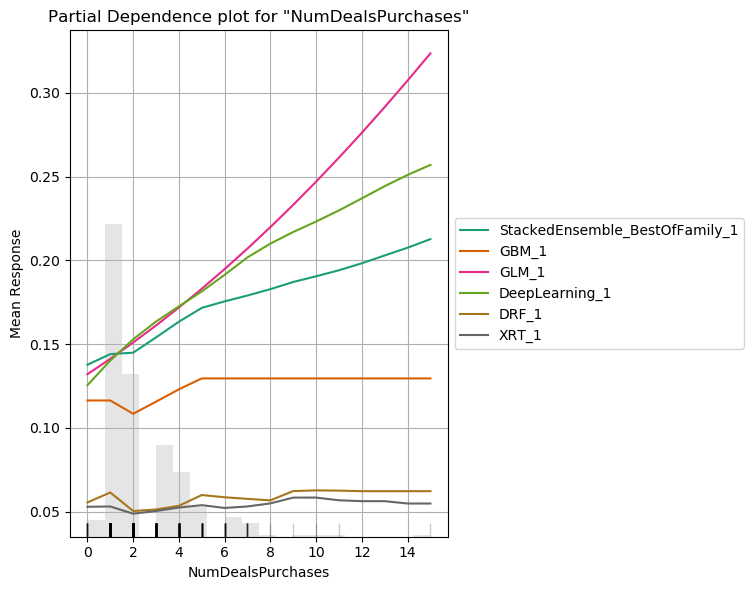

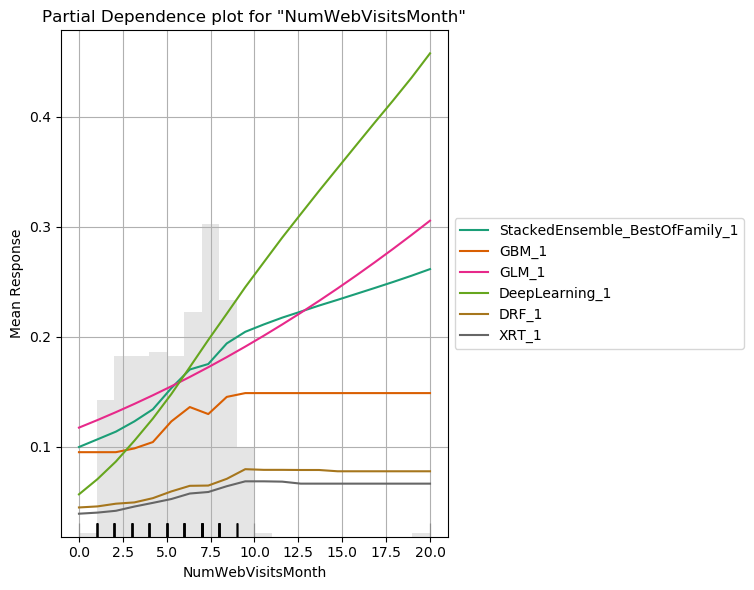

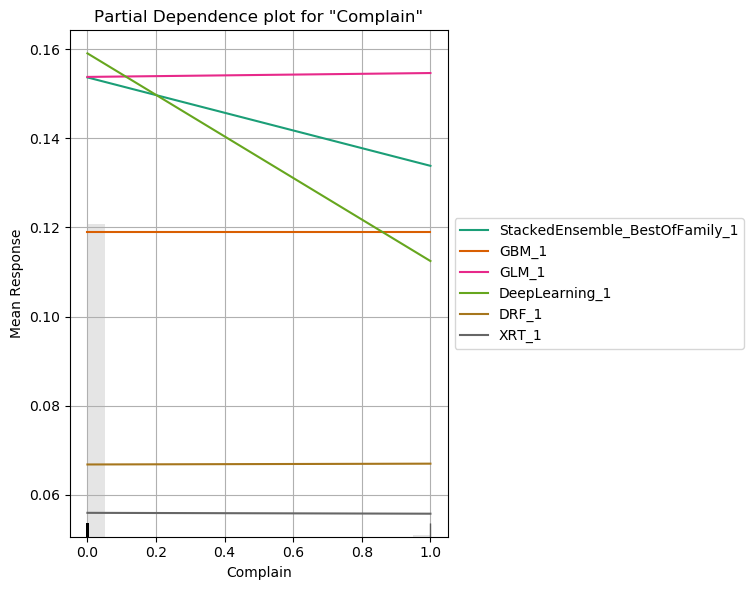

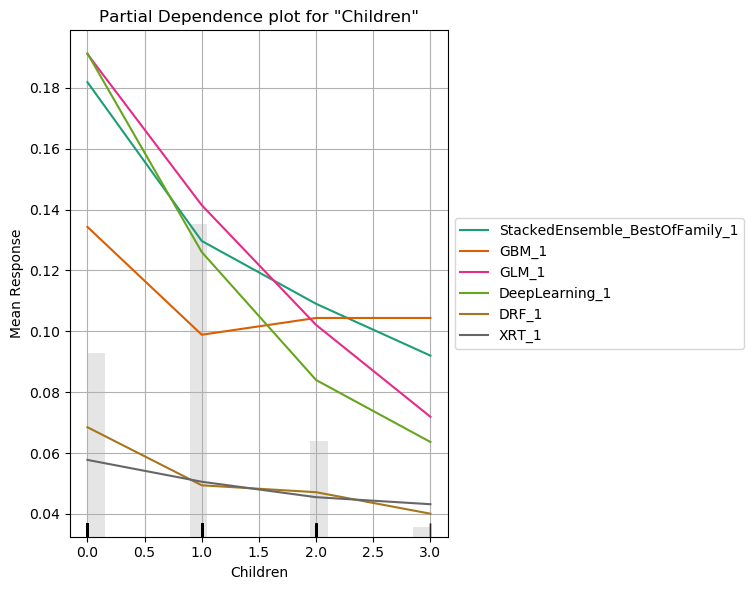

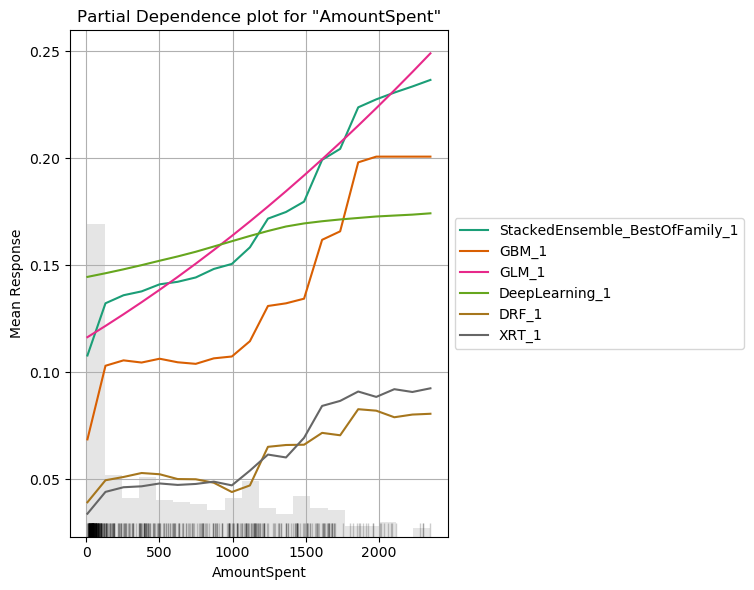

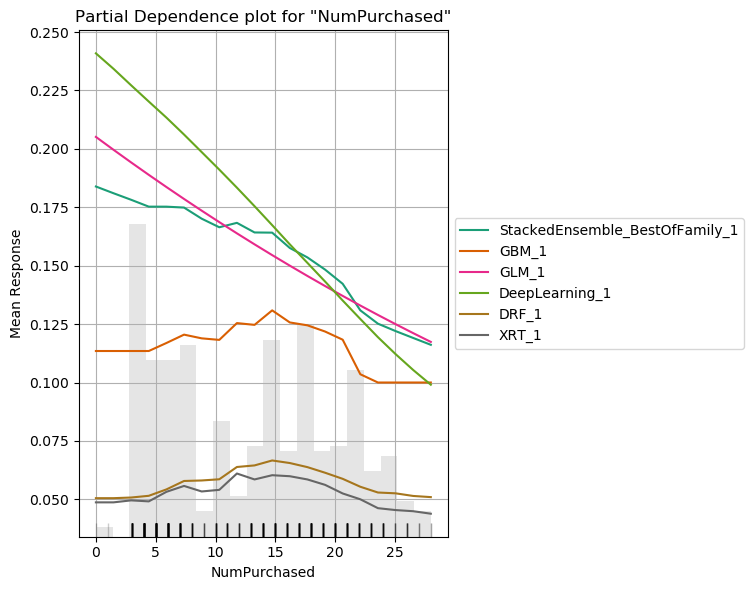

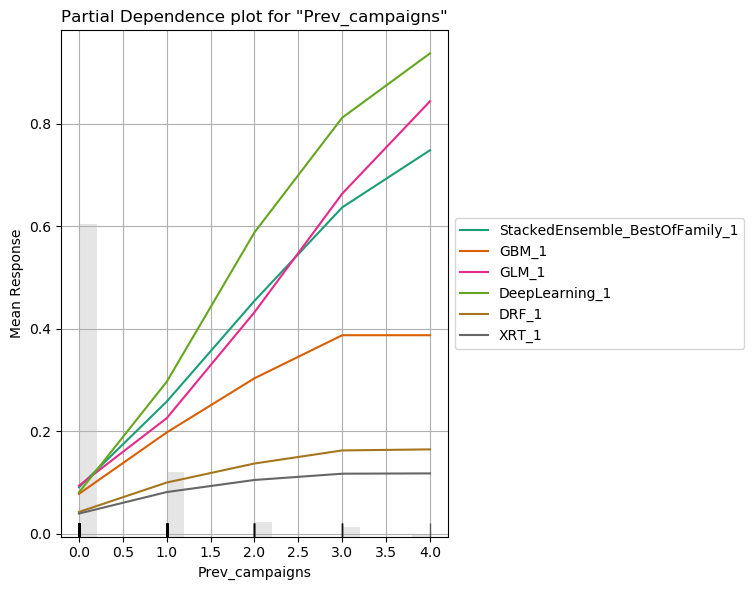

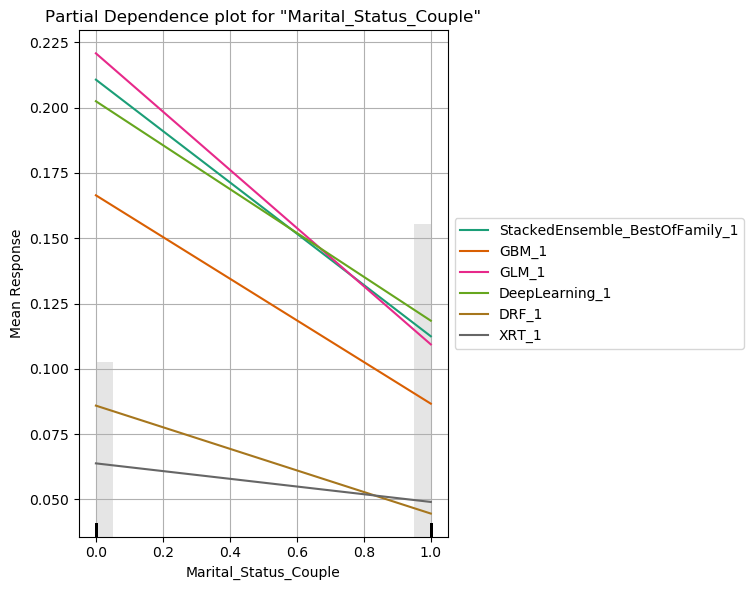

In [106]:
explain_model = aml.explain(frame = test, figsize = (8,6),include_explanations=['pdp'])


## Interpreting Partial Dependency Plots

The pdp shows us the effect of each feature on prediction.

Prev_campaign has a high linear dependency while compain has no effect on prediction

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ---------------
StackedEnsemble_BestOfFamily_1_AutoML_8_20230329_203237  0.905065   0.279819  0.699114                0.164246  0.293726  0.0862752                 649                   0.015108  StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_8_20230329_203237     0.904842   0.280204  0.694729                0.166723  0.293972  0.0864197                 763                   0.019874  StackedEnsemble
GBM_1_AutoML_8_20230329_203237                           0.904153   0.297101  0.692138                0.174469  0.306446  0.0939089                 218                   0.009609  GBM
GBM_3_AutoML_8_20230329_203237                           0.900968   0.334679  0.690449                0.205773  0.324805  0.105499                   66                   0.011368  GBM
GBM_2_AutoML_8_20230329_203237                           0.900503   0.338769  0.685194                0.201583  0.327407  0.107195                   70                   0.007686  GBM
GLM_1_AutoML_8_20230329_203237                           0.890968   0.293114  0.677646                0.173389  0.299829  0.0898975                  24                   0.00465   GLM
GBM_4_AutoML_8_20230329_203237                           0.888045   0.367863  0.629228                0.219423  0.339515  0.11527                    87                   0.007622  GBM
DRF_1_AutoML_8_20230329_203237                           0.887821   0.609673  0.618866                0.174469  0.35311   0.124687                  163                   0.010318  DRF
XRT_1_AutoML_8_20230329_203237                           0.885121   0.480372  0.595675                0.180372  0.360562  0.130005                  190                   0.011884  DRF
GBM_5_AutoML_8_20230329_203237                           0.877412   0.351217  0.646528                0.266536  0.33015   0.108999                   69                   0.007955  GBM
GBM_grid_1_AutoML_8_20230329_203237_model_1              0.860335   0.390988  0.611441                0.213259  0.347234  0.120572                  100                   0.009001  GBM
DeepLearning_1_AutoML_8_20230329_203237                  0.854004   0.359476  0.608026                0.230279  0.322598  0.104069                   54                   0.006     DeepLearning
[12 rows x 10 columns]

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_8_20230329_203237

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21593509689718593
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      312  46   0.1285   (46.0/358.0)
1      15   60   0.2      (15.0/75.0)
Total  327  106  0.1409   (61.0/433.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

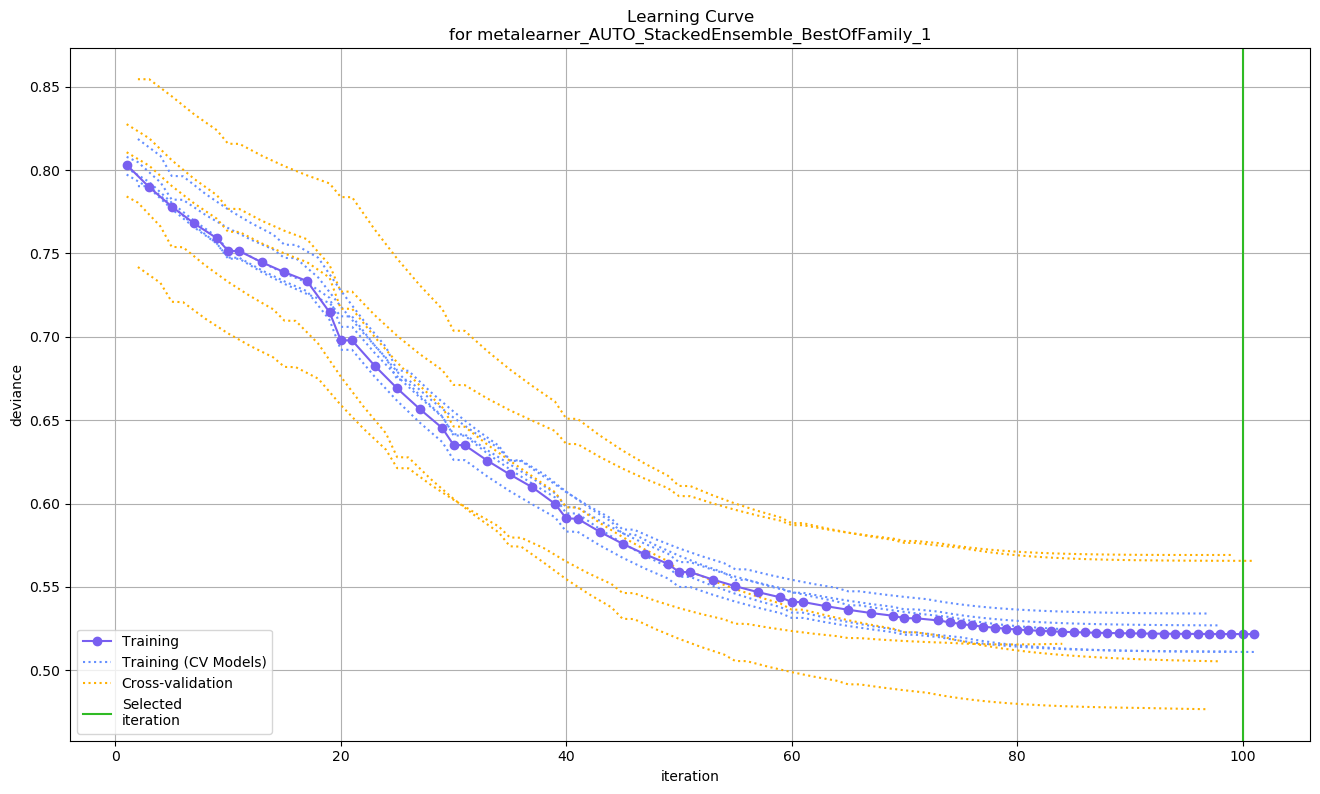

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

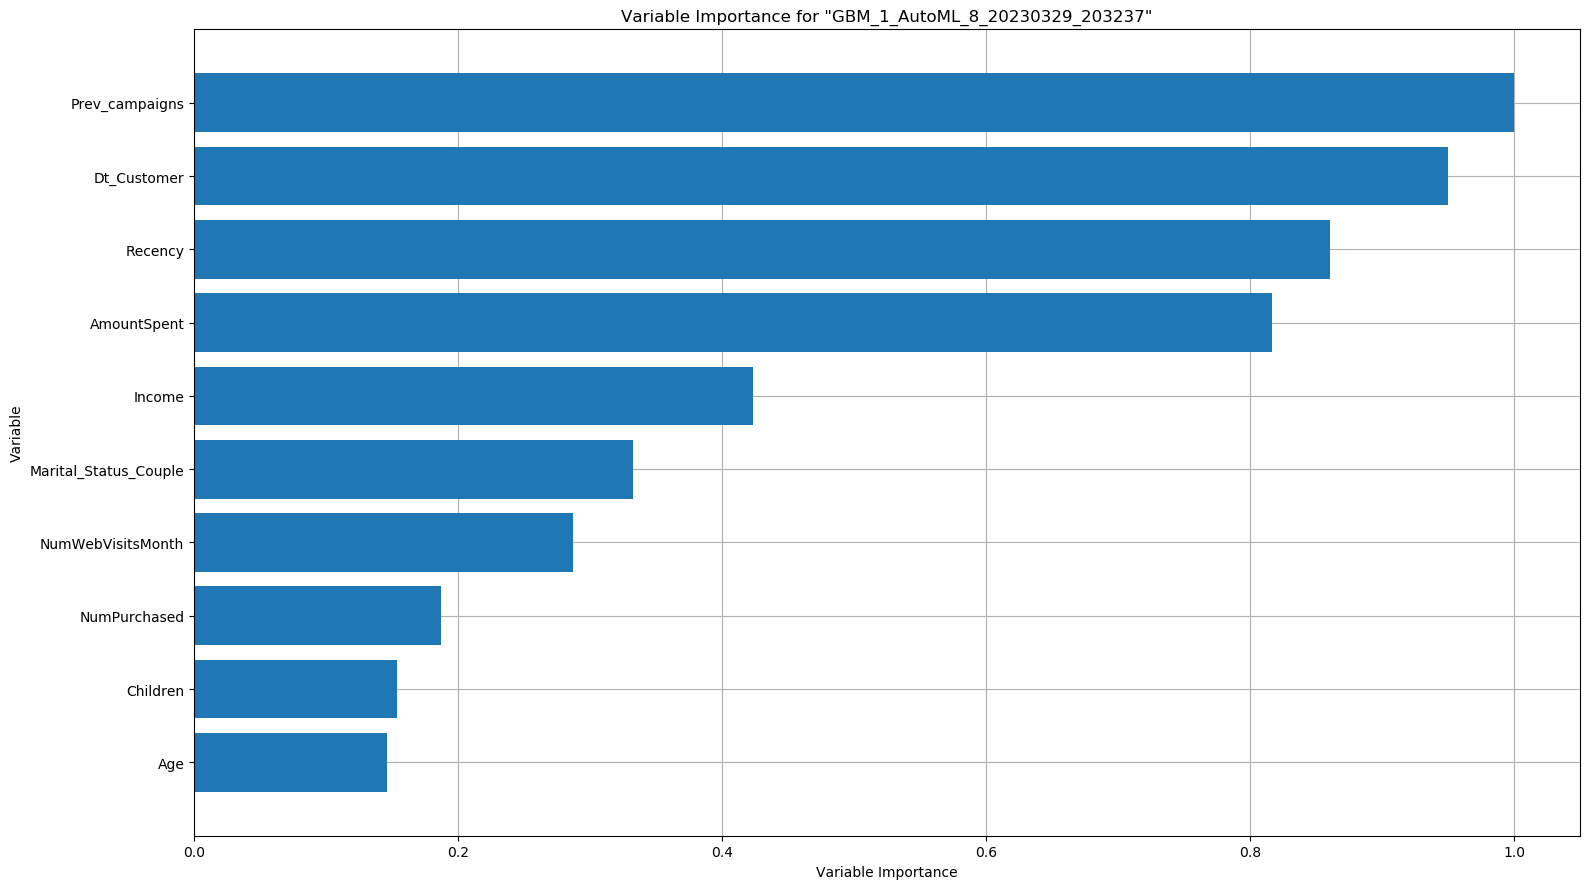

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

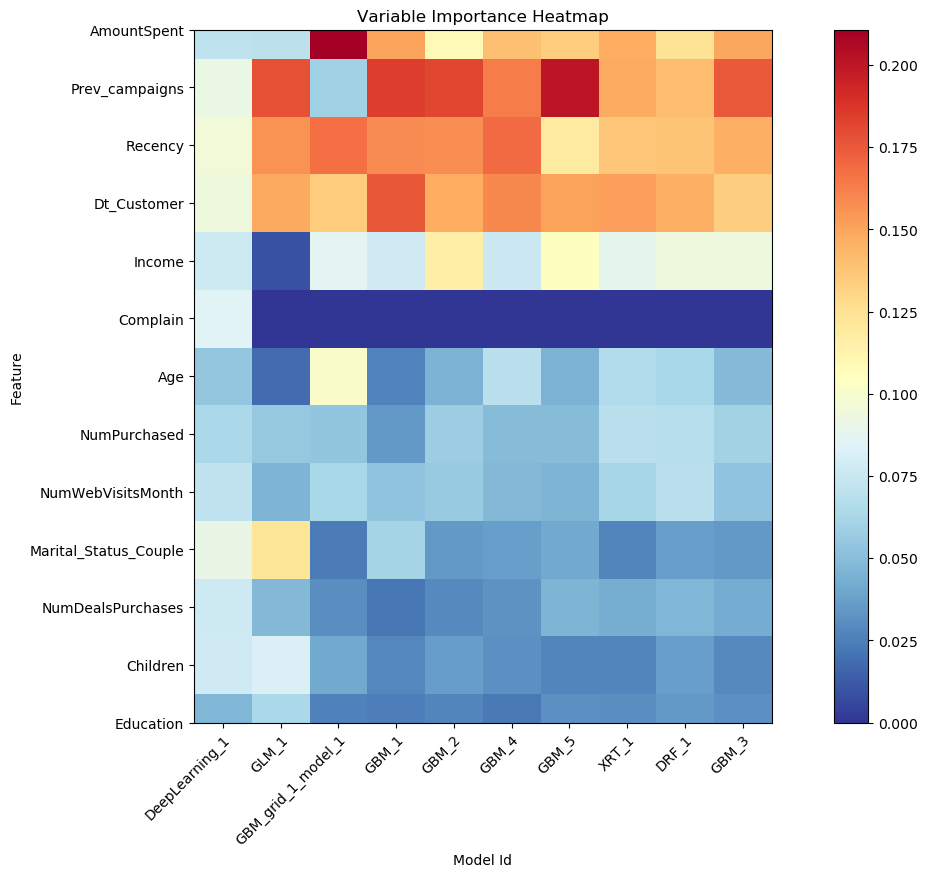

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

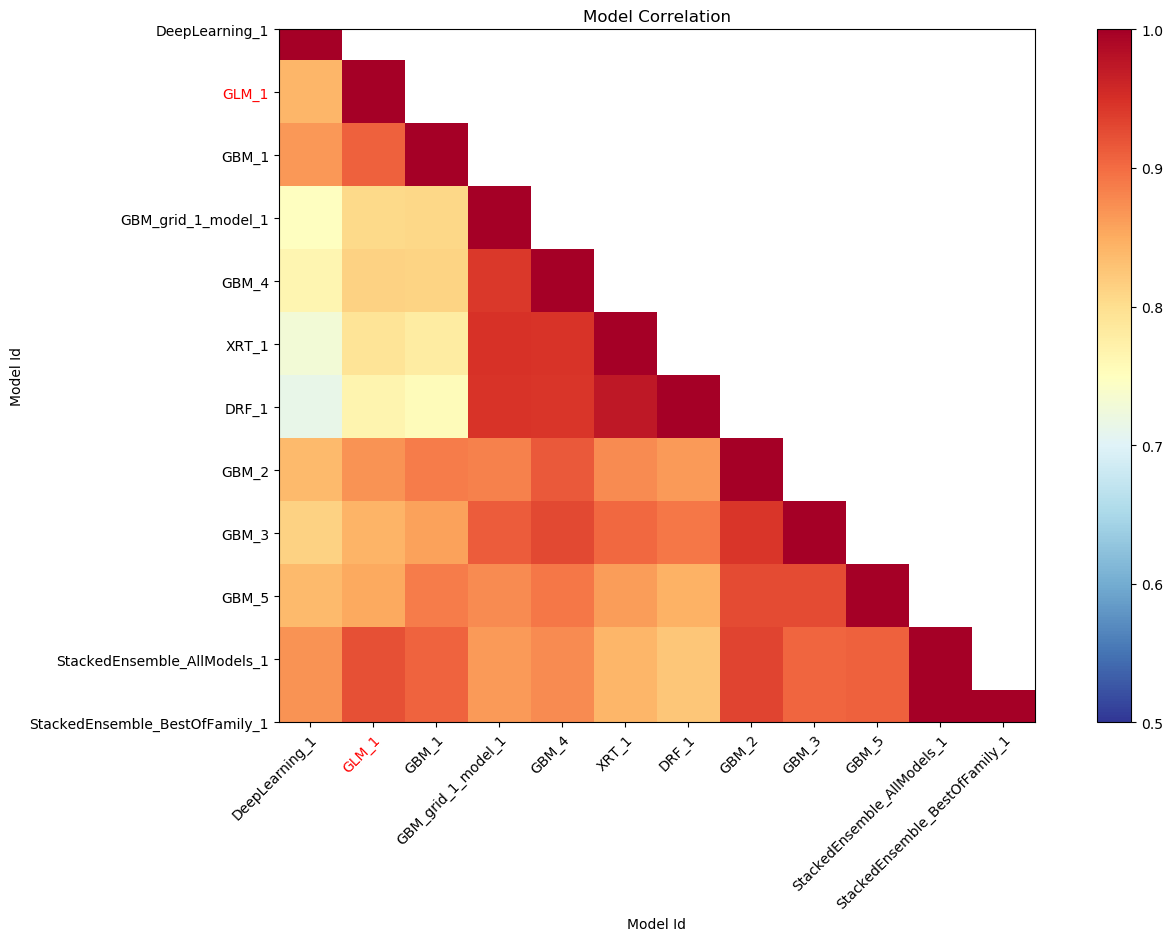

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

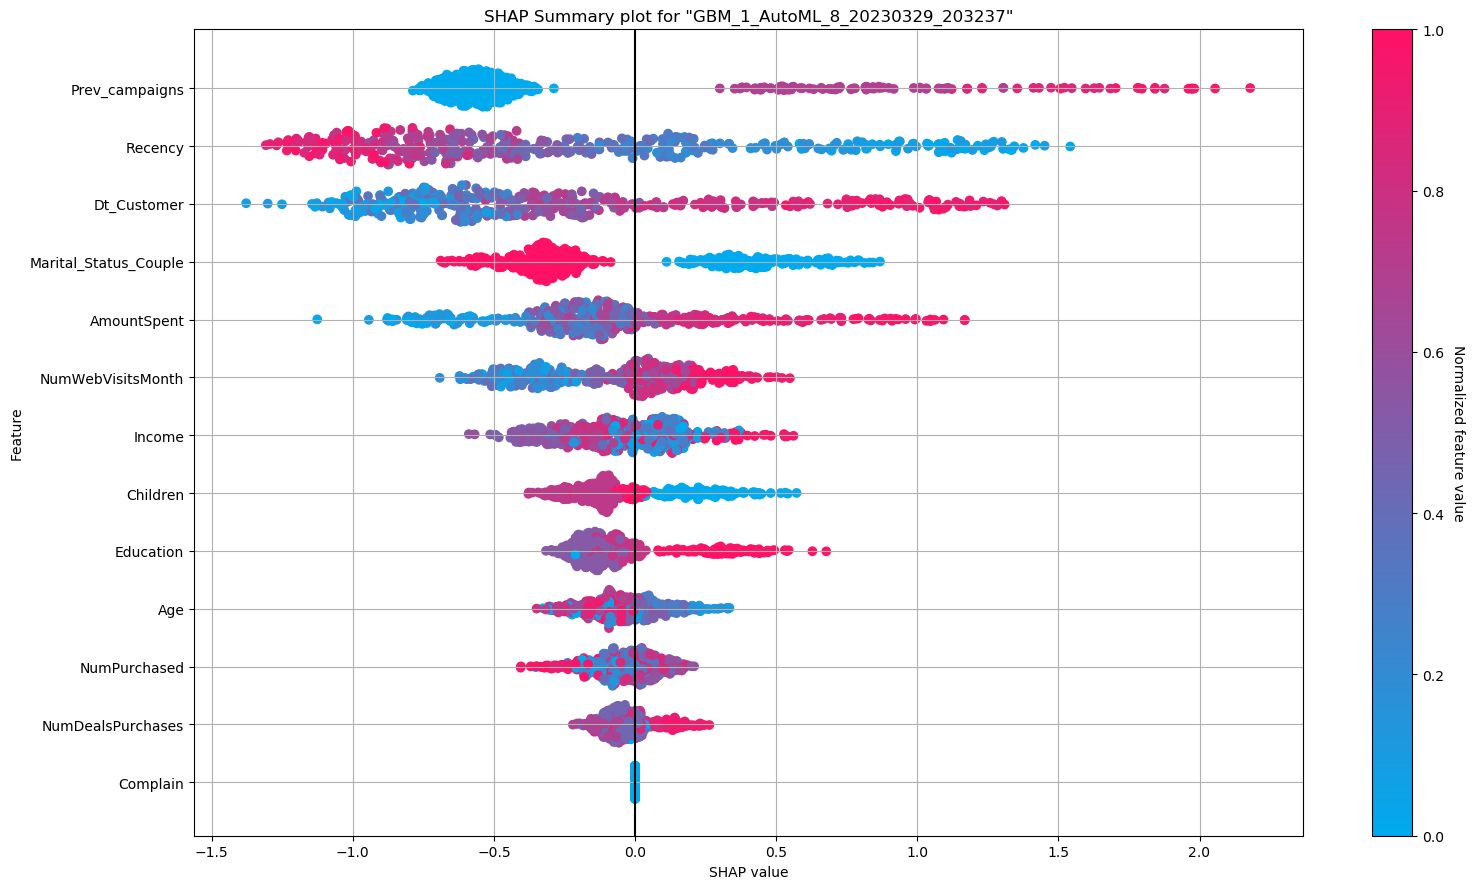

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

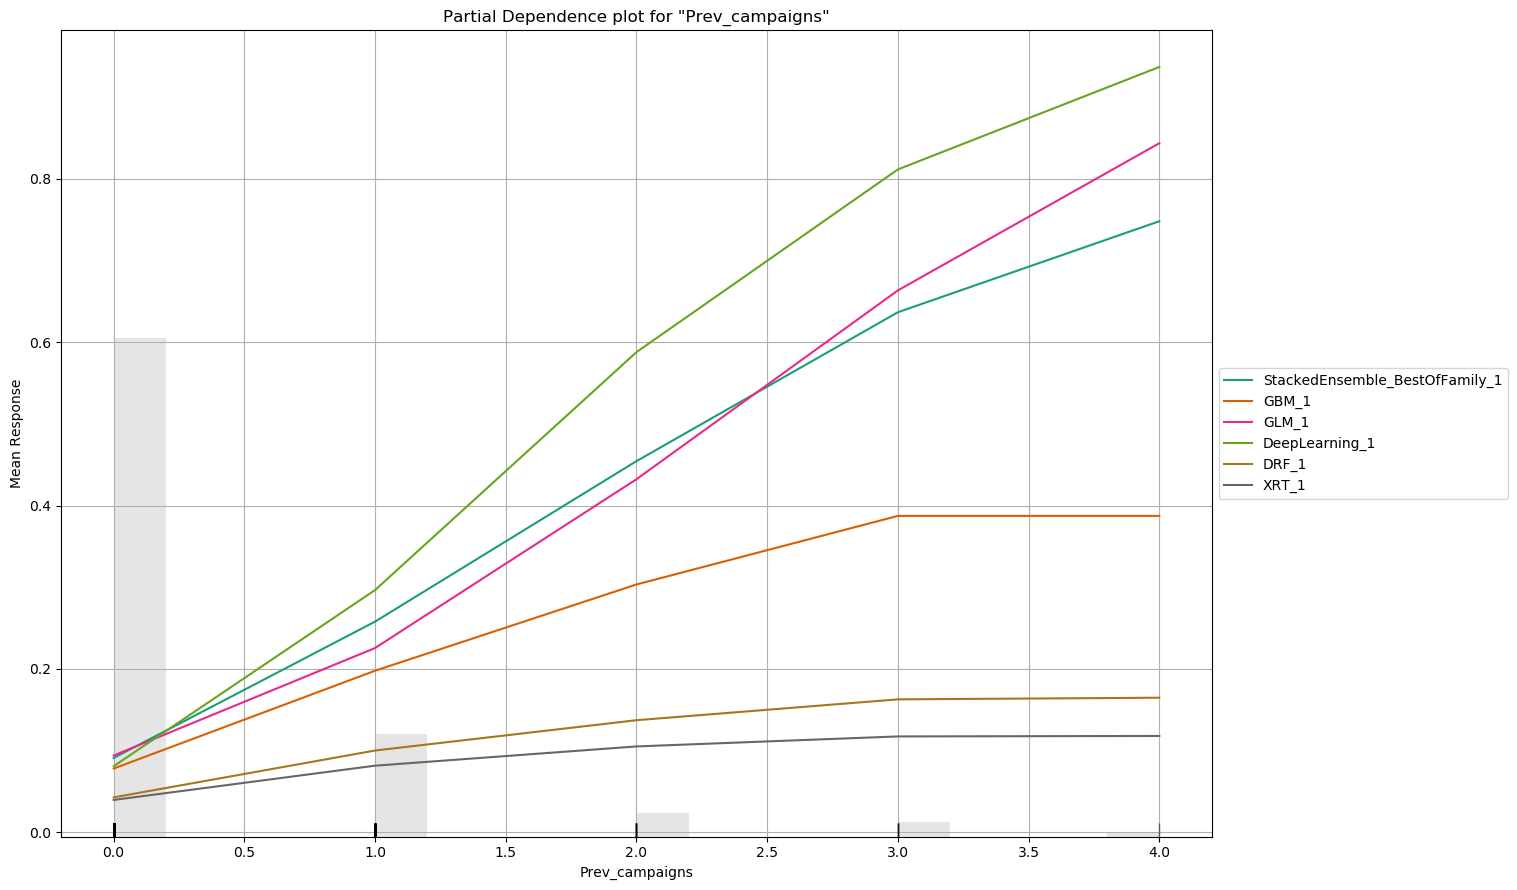

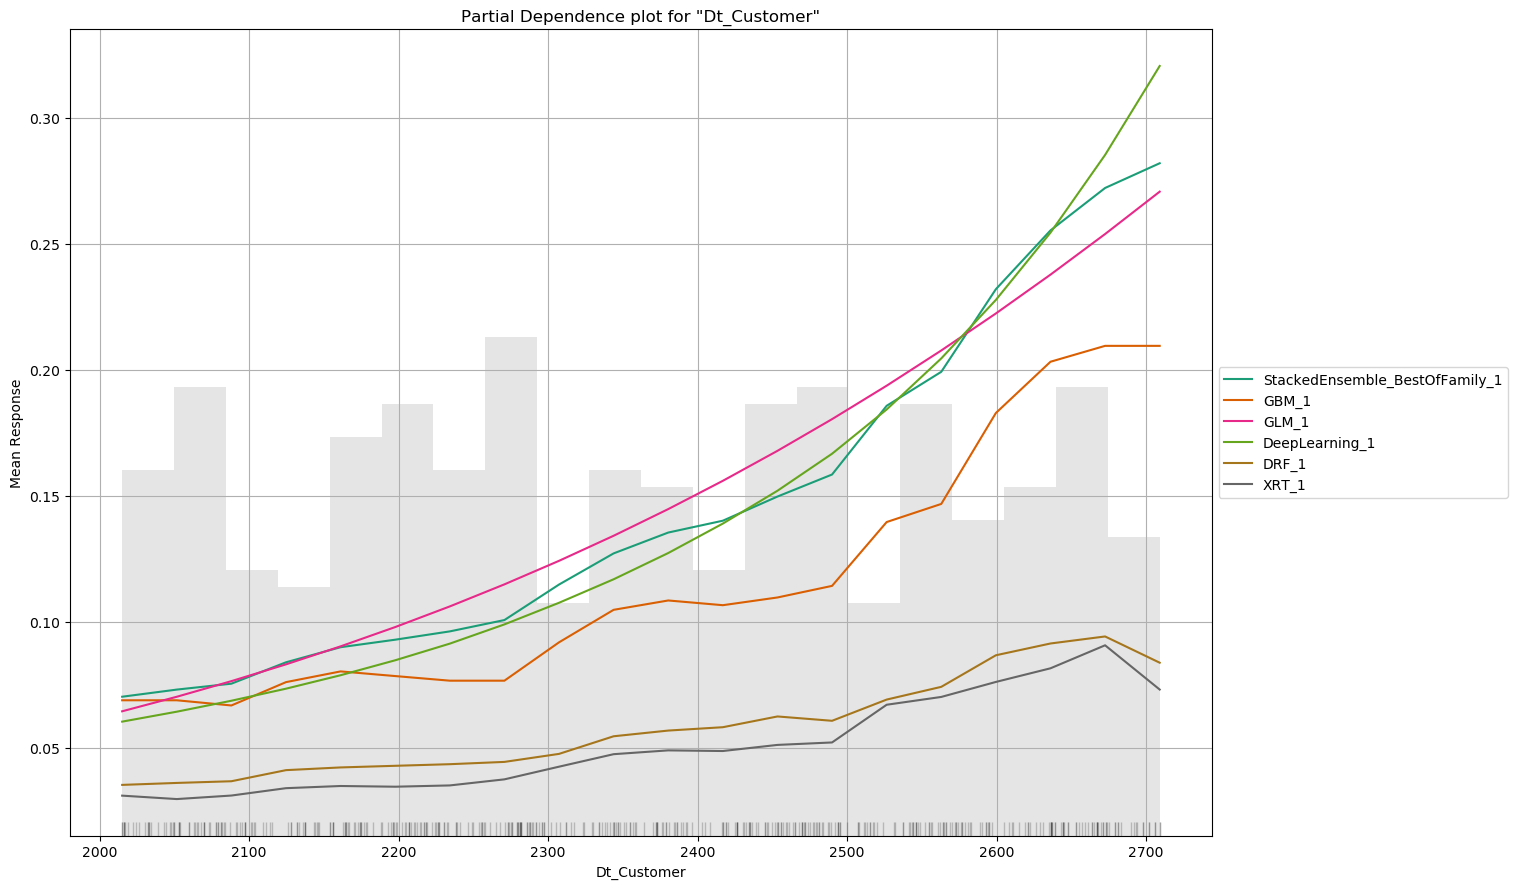

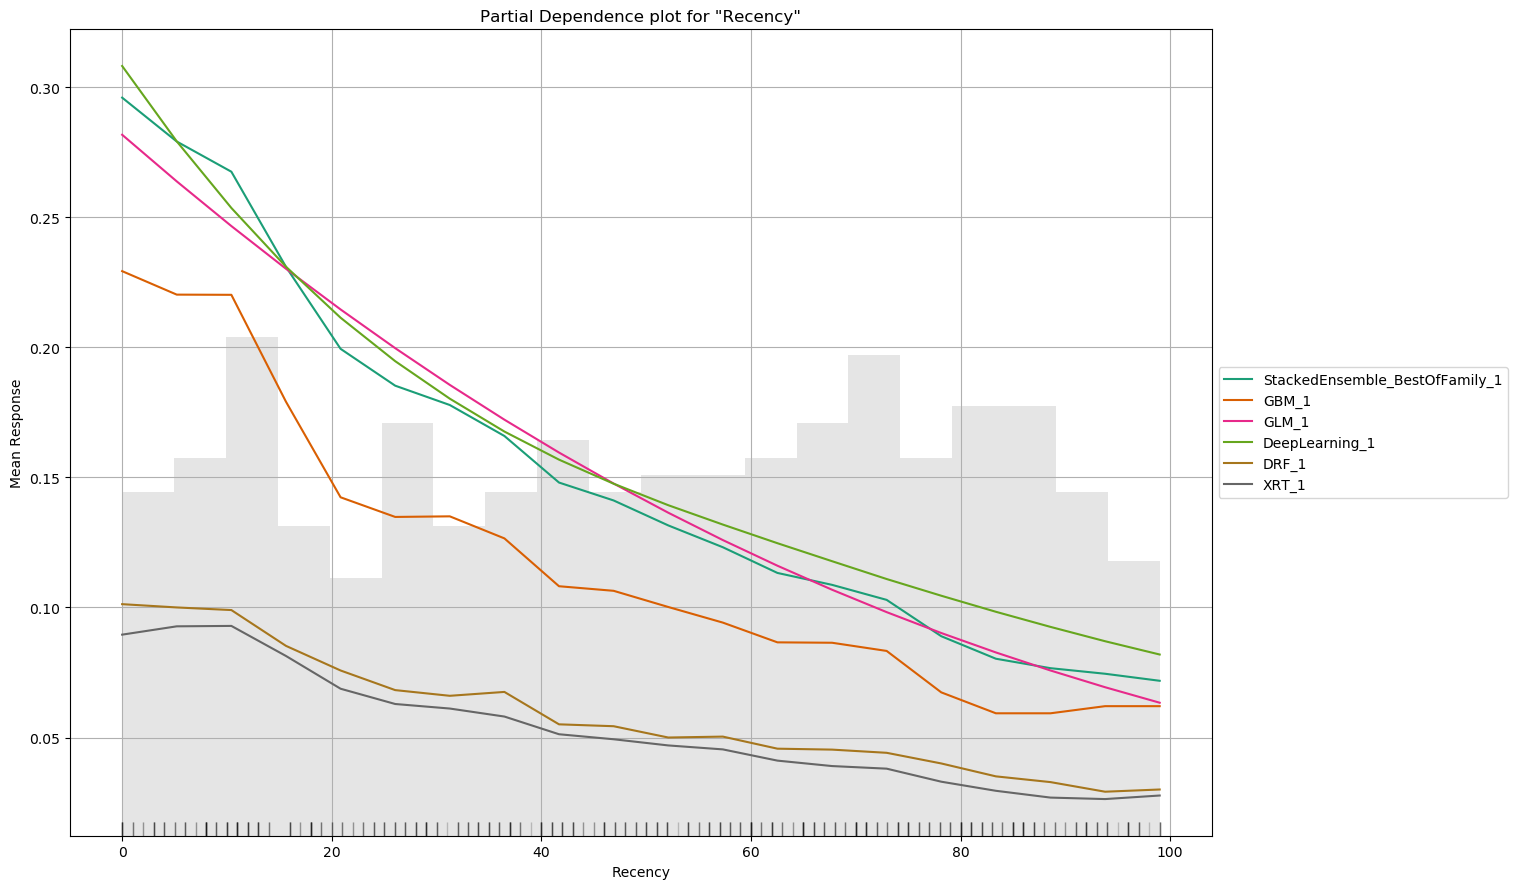

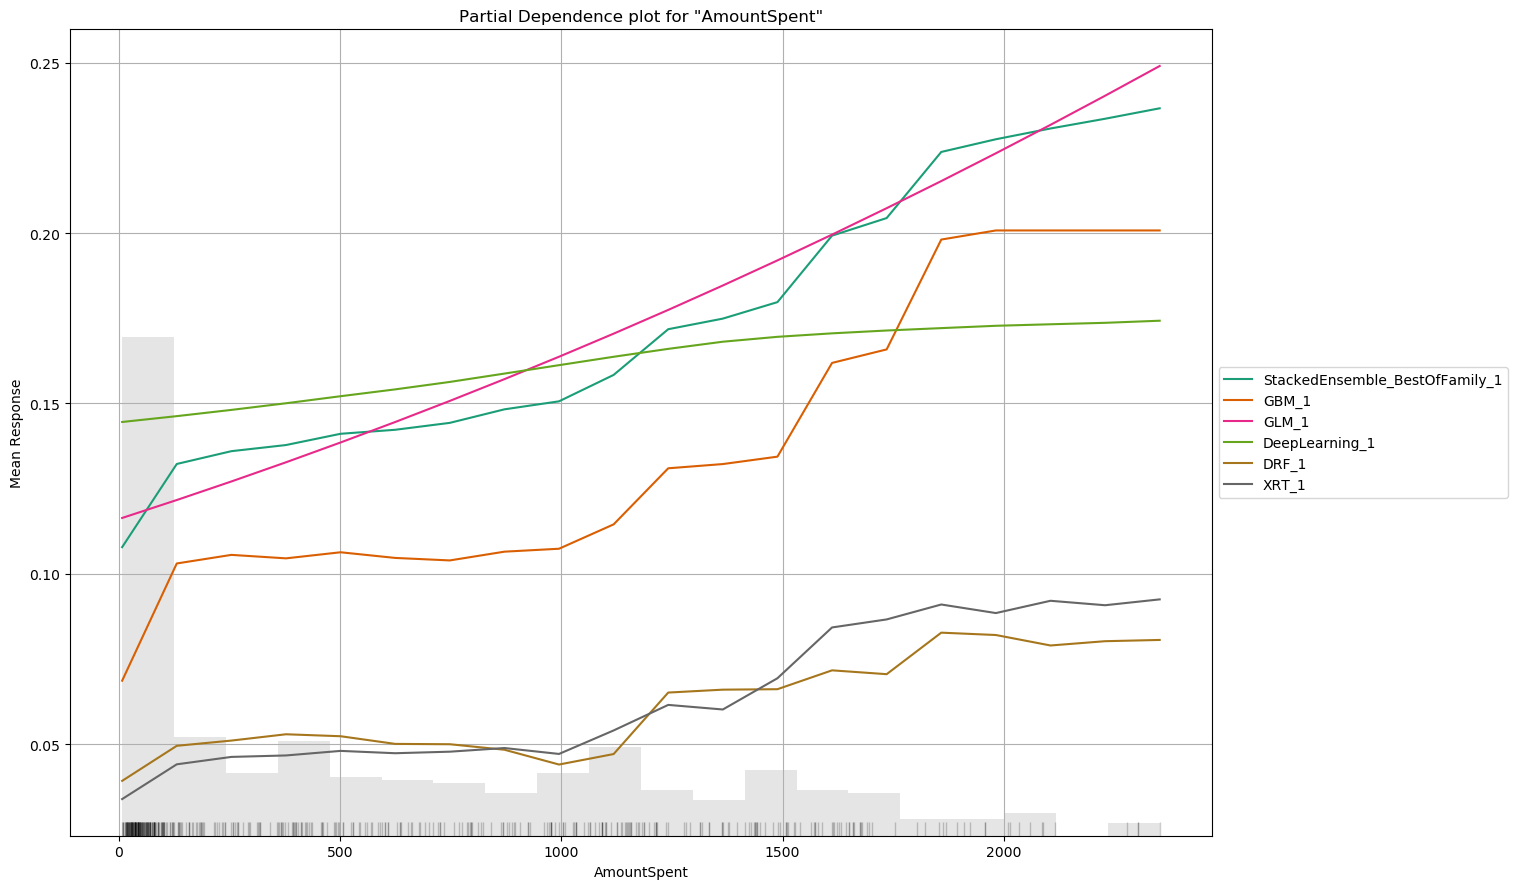

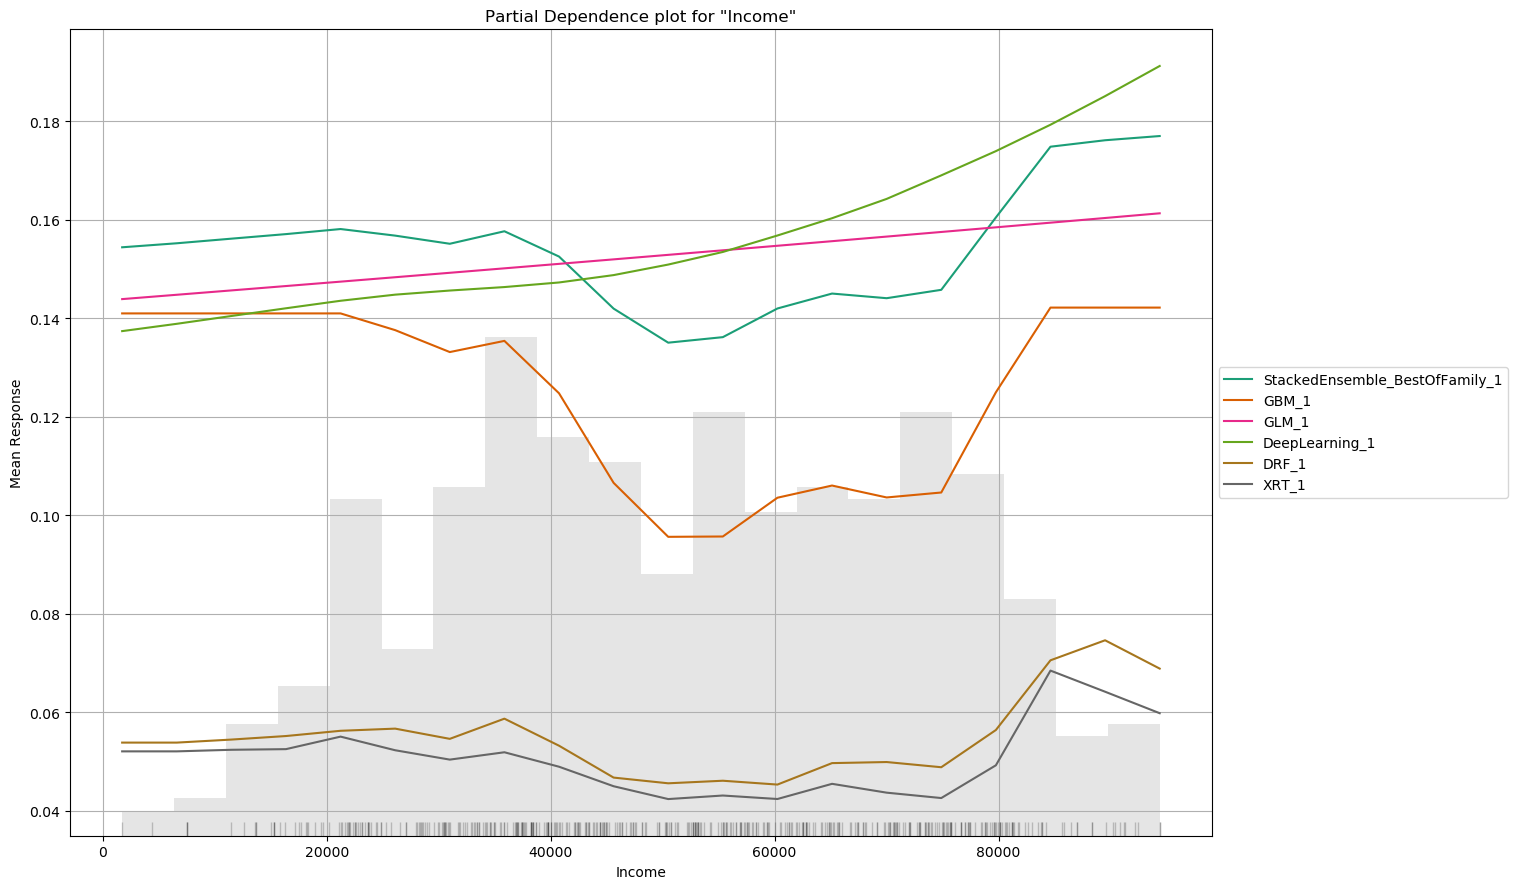

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  --------  ---------  --------  ----------------------  --------  ---------  ------------------  -------------------------  ---------------
StackedEnsemble_BestOfFamily_1_AutoML_8_20230329_203237  0.905065   0.279819  0.699114                0.164246  0.293726  0.0862752                 649                   0.015108  StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_8_20230329_203237     0.904842   0.280204  0.694729                0.166723  0.293972  0.0864197                 763                   0.019874  StackedEnsemble
GBM_1_AutoML_8_20230329_203237                           0.904153   0.297101  0.692138                0.174469  0.306446  0.0939089                 218                   0.009609  GBM
GBM_3_AutoML_8_20230329_203237                           0.900968   0.334679  0.690449                0.205773  0.324805  0.105499                   66                   0.011368  GBM
GBM_2_AutoML_8_20230329_203237                           0.900503   0.338769  0.685194                0.201583  0.327407  0.107195                   70                   0.007686  GBM
GLM_1_AutoML_8_20230329_203237                           0.890968   0.293114  0.677646                0.173389  0.299829  0.0898975                  24                   0.00465   GLM
GBM_4_AutoML_8_20230329_203237                           0.888045   0.367863  0.629228                0.219423  0.339515  0.11527                    87                   0.007622  GBM
DRF_1_AutoML_8_20230329_203237                           0.887821   0.609673  0.618866                0.174469  0.35311   0.124687                  163                   0.010318  DRF
XRT_1_AutoML_8_20230329_203237                           0.885121   0.480372  0.595675                0.180372  0.360562  0.130005                  190                   0.011884  DRF
GBM_5_AutoML_8_20230329_203237                           0.877412   0.351217  0.646528                0.266536  0.33015   0.108999                   69                   0.007955  GBM
GBM_grid_1_AutoML_8_20230329_203237_model_1              0.860335   0.390988  0.611441                0.213259  0.347234  0.120572                  100                   0.009001  GBM
DeepLearning_1_AutoML_8_20230329_203237                  0.854004   0.359476  0.608026                0.230279  0.322598  0.104069                   54                   0.006     DeepLearning
[12 rows x 10 columns]

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_1_AutoML_8_20230329_203237

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21593509689718593
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      312  46   0.1285   (46.0/358.0)
1      15   60   0.2      (15.0/75.0)
Total  327  106  0.1409   (61.0/433.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [107]:
aml.explain(test)

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

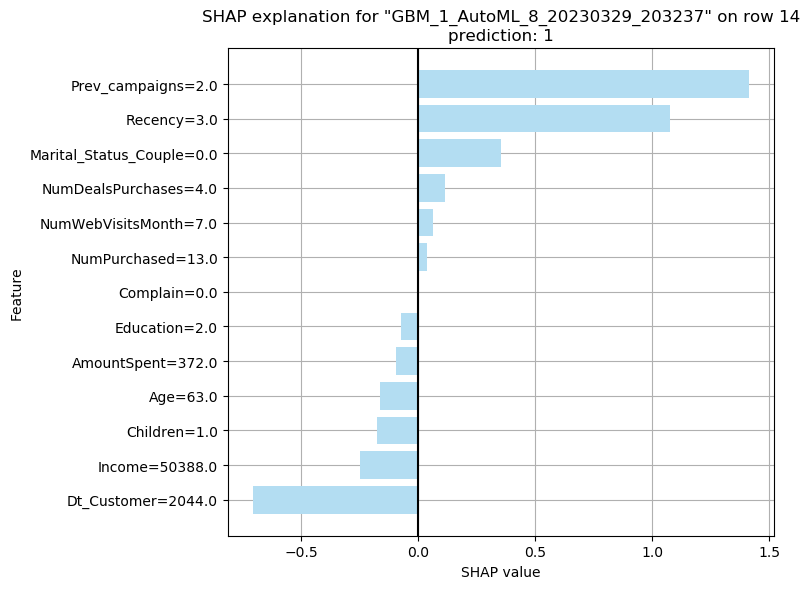

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [108]:
aml.explain_row(frame = test, row_index = 14, figsize = (8,6), exclude_explanations = "leaderboard")


# SHAP Analysis for Linear and Tree-Based Models


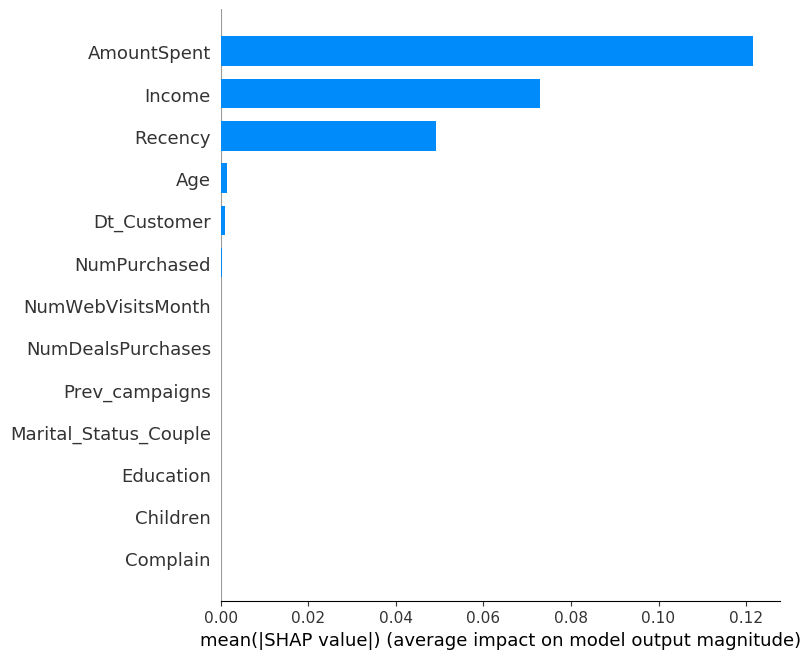

In [109]:
# SHAP variable importance for a Linear Model
shap.summary_plot(linear_shap_values, x_train, plot_type="bar")

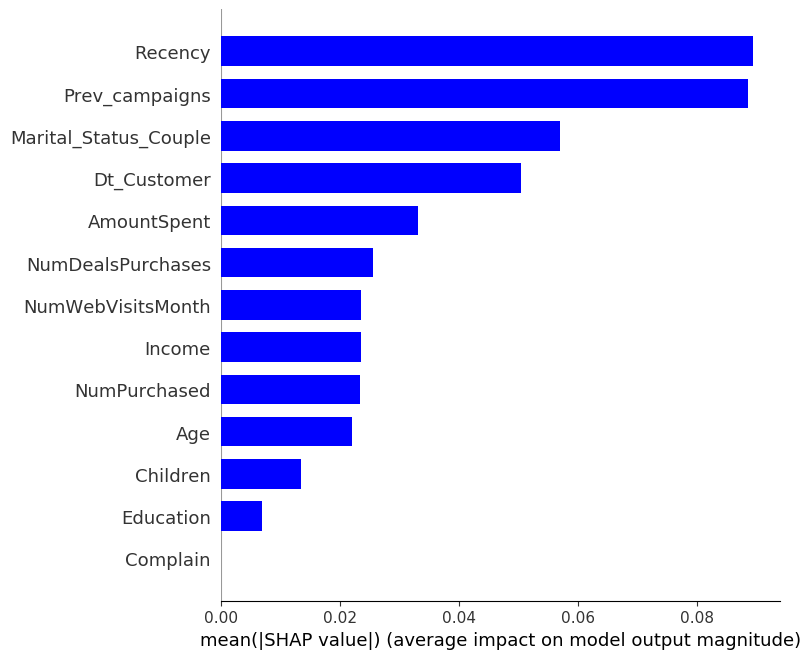

In [110]:
# SHAP variable importance for Tree based model
shap.summary_plot(tree_shap_values, x_train, plot_type="bar", color="blue")

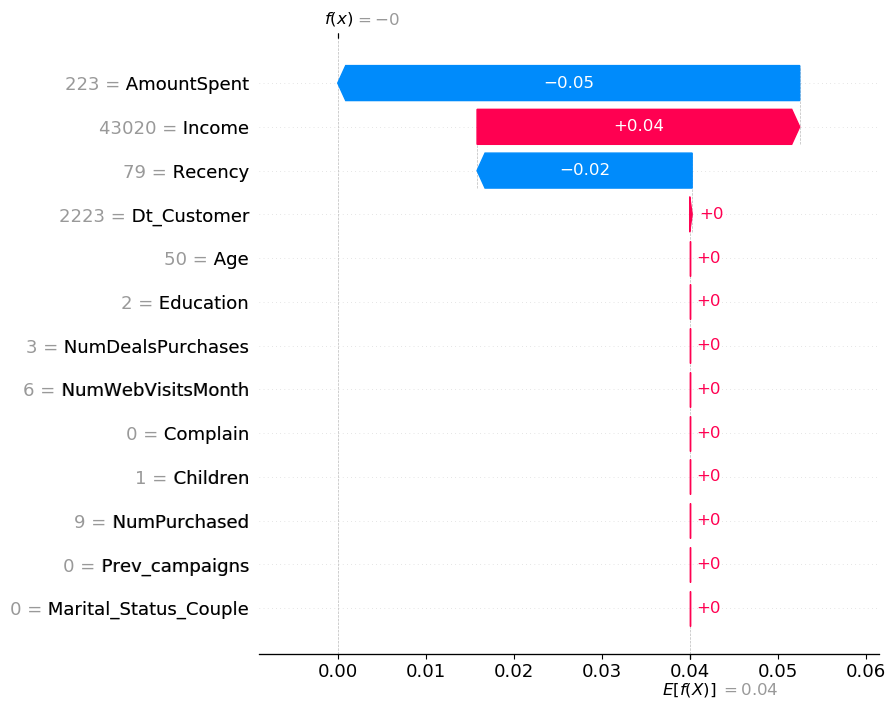

In [111]:
# Waterfall plot for linear model
shap.plots.waterfall(linear_shap_values[sample_ind], max_display=14)

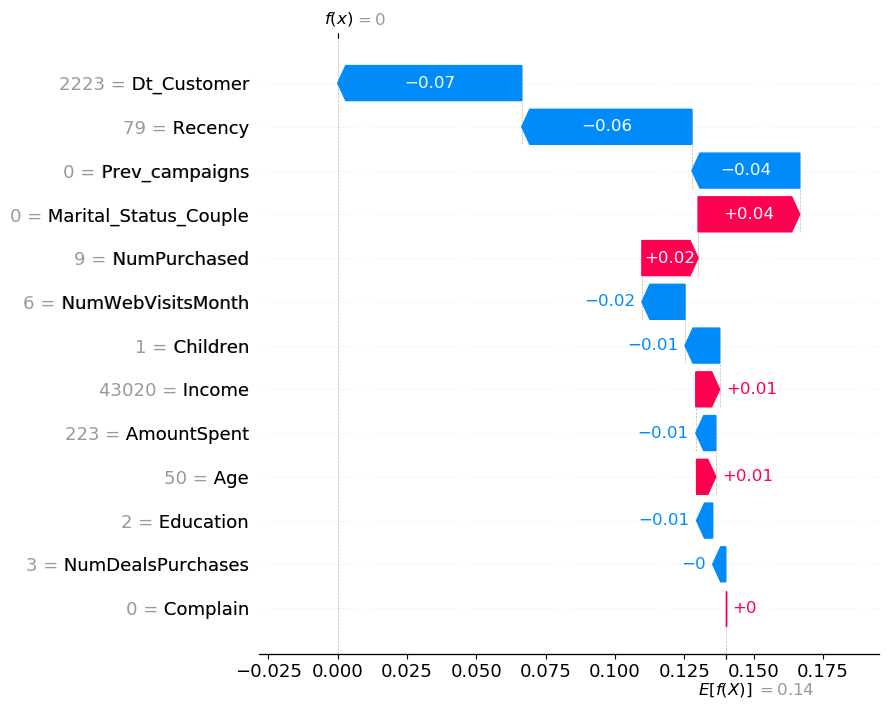

In [112]:
# Waterfall plot for Tree Based Model
shap.plots.waterfall(tree_shap_values[sample_ind], max_display=14)

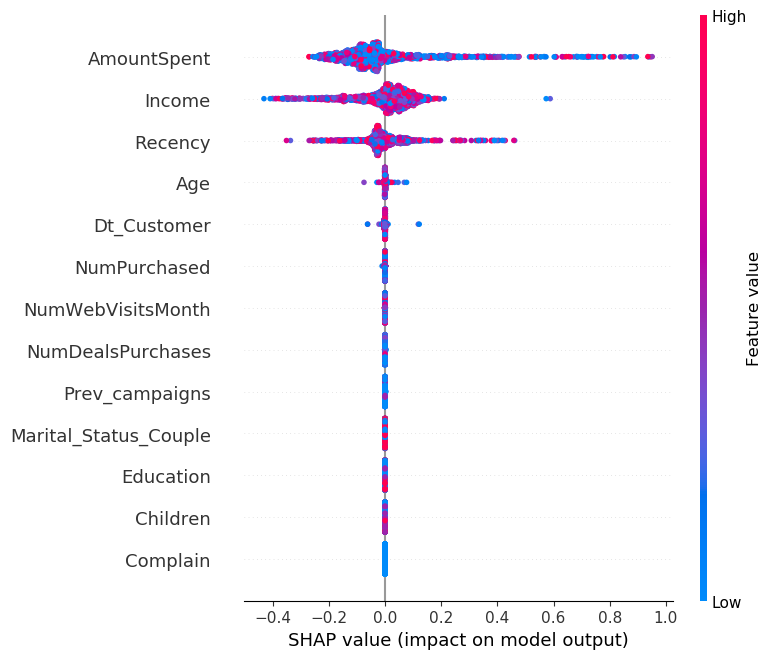

In [113]:
# SHAP summary for Linear Model
shap.summary_plot(linear_shap_values, x_train)

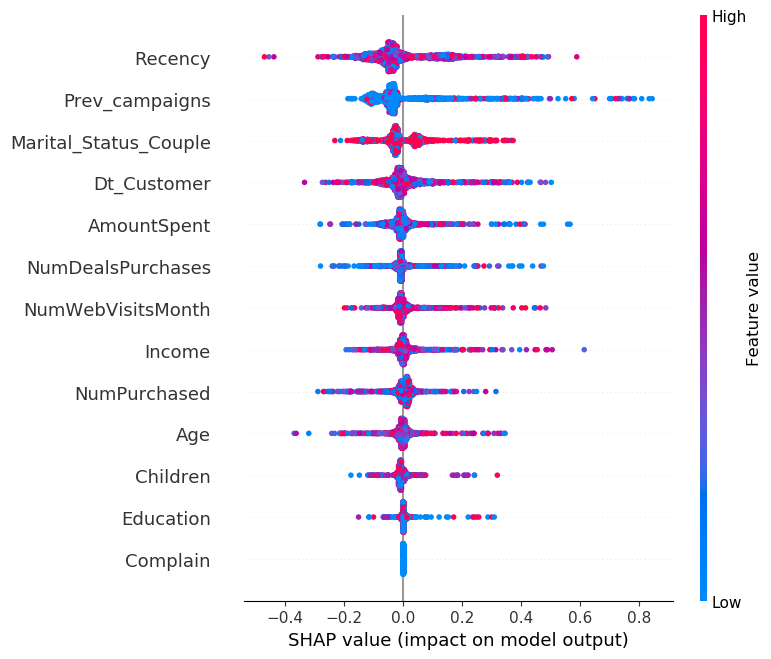

In [114]:
# SHAP summary for Tree Based Model
shap.summary_plot(tree_shap_values, x_train)

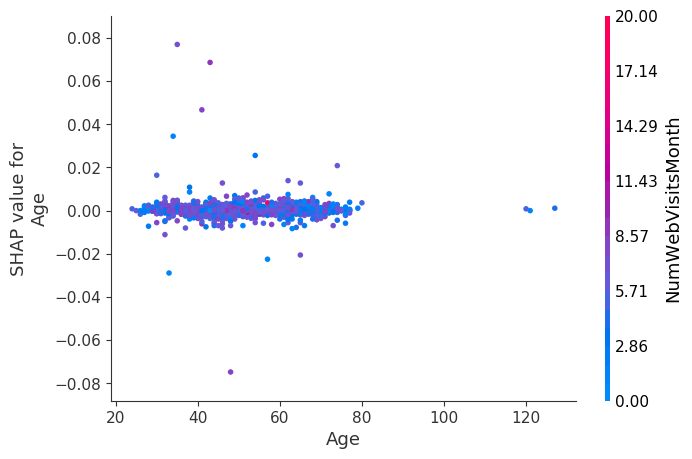

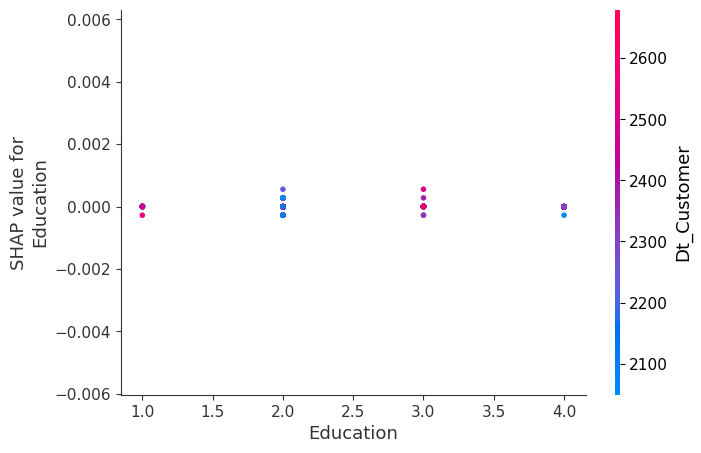

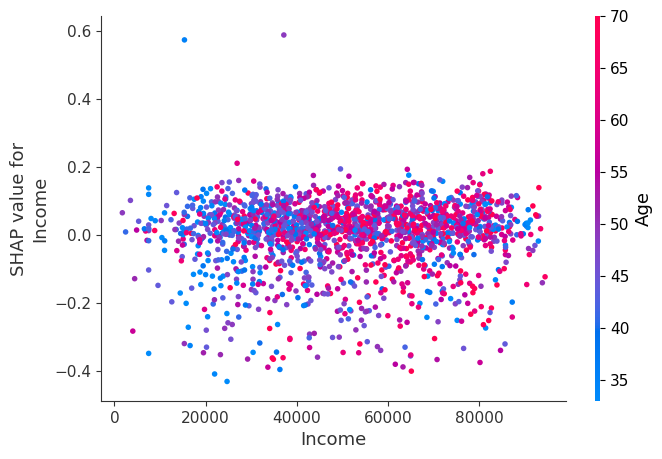

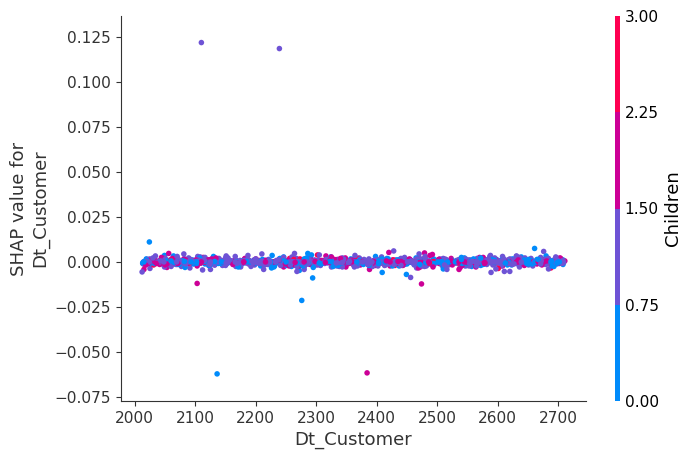

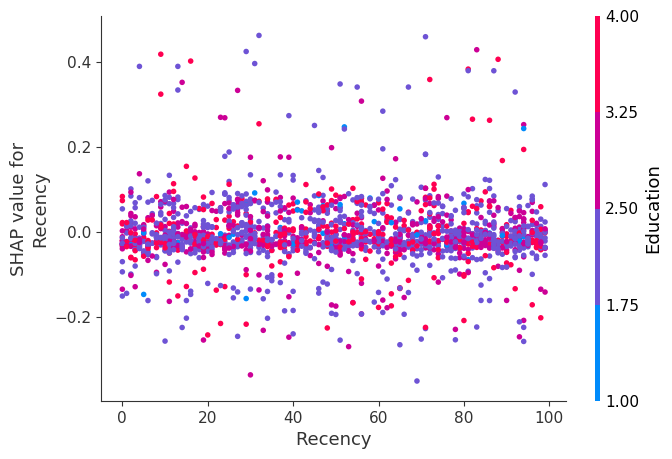

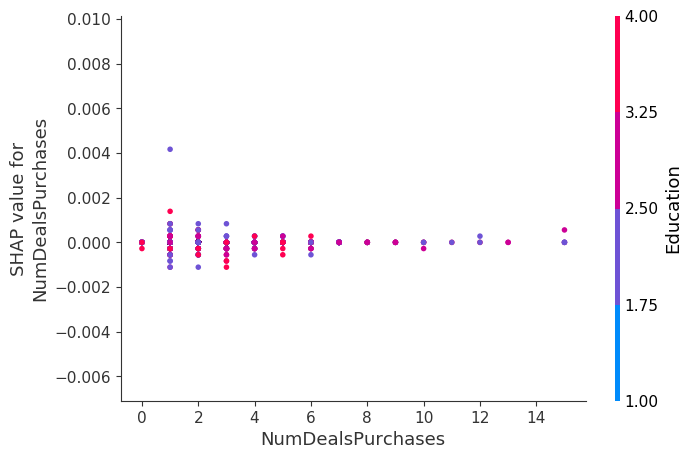

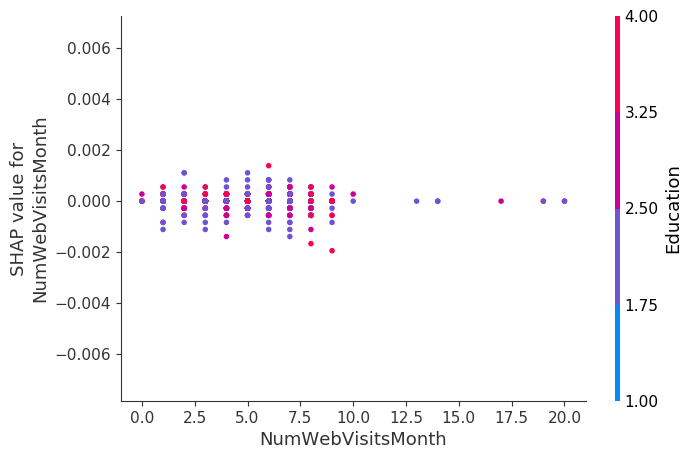

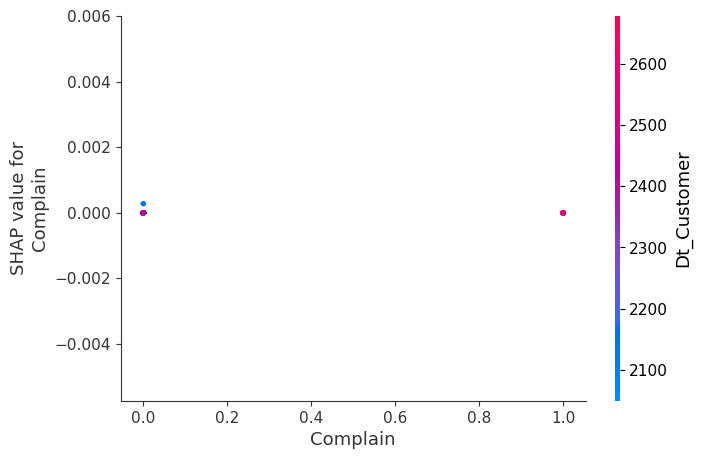

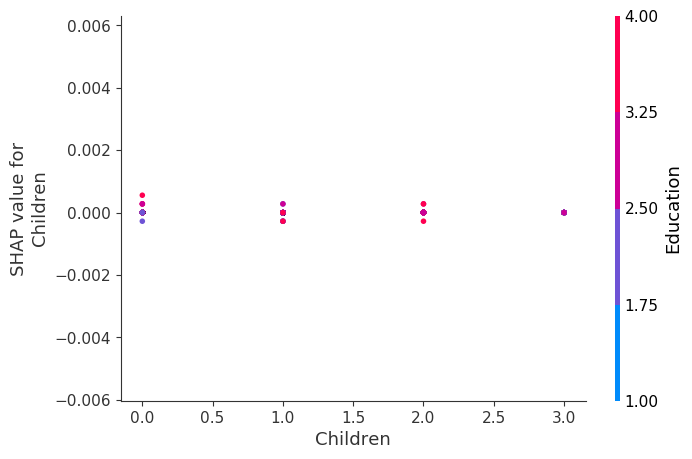

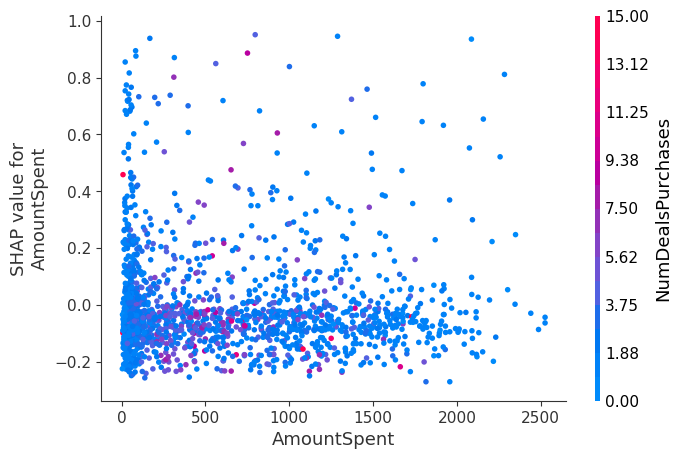

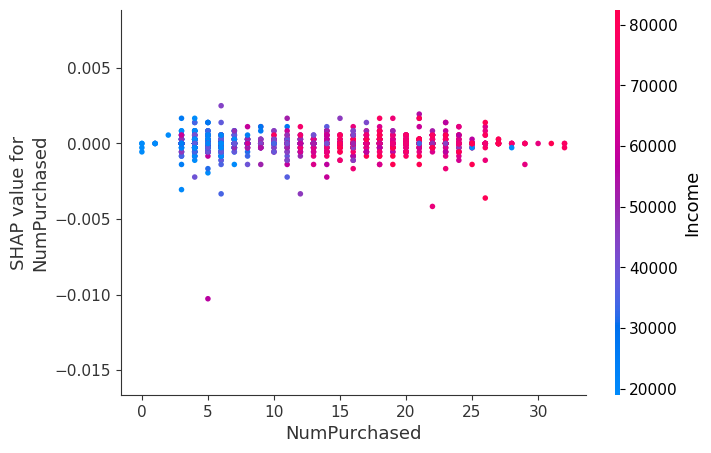

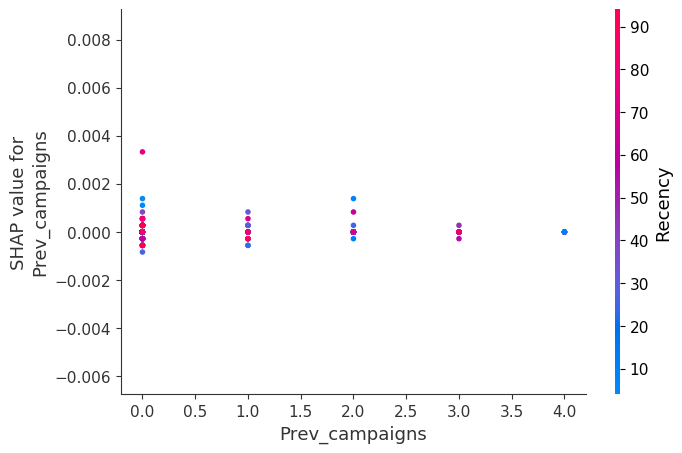

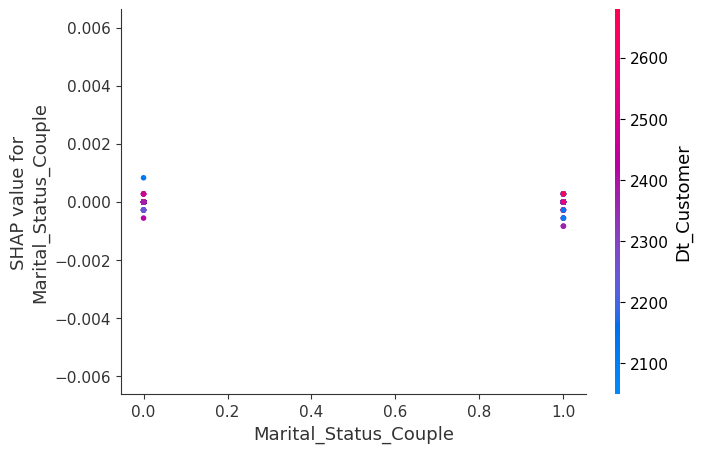

In [115]:
# SHAP partial dependence plot for linear model
for i in x_train.columns:
    shap.dependence_plot(i, linear_shap_values.values, x_train)

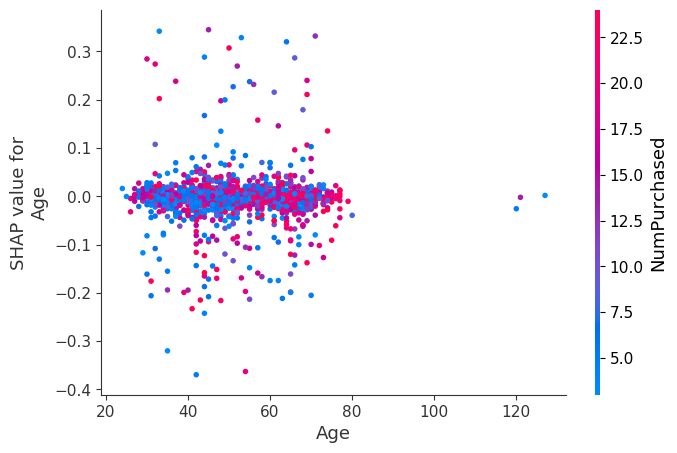

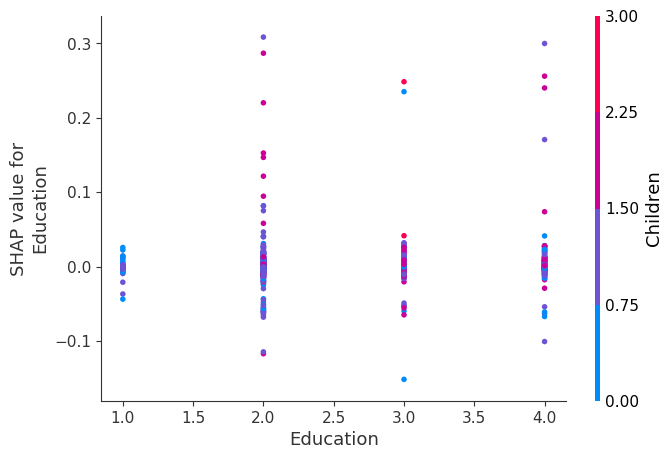

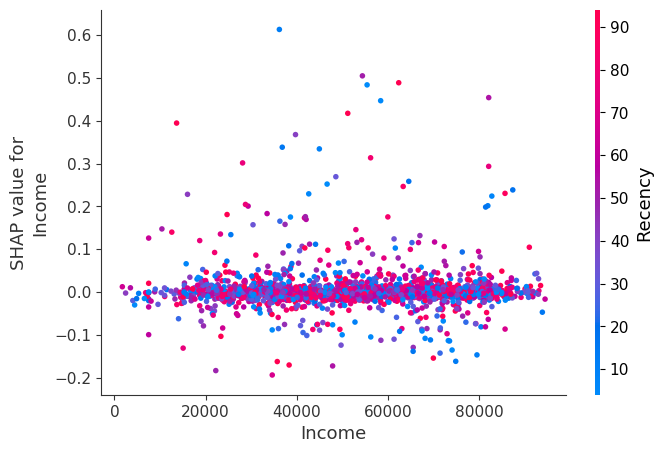

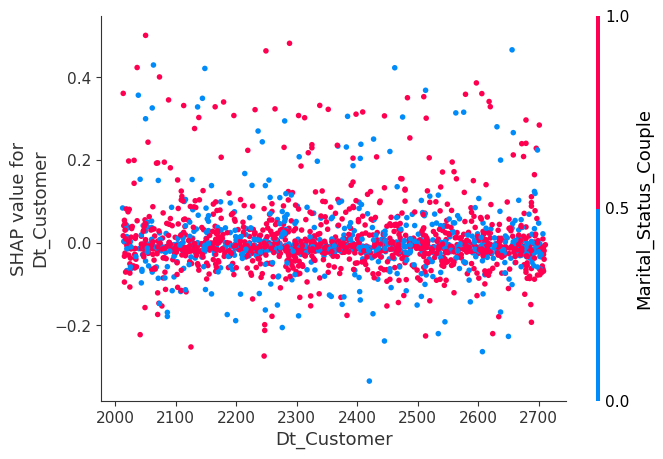

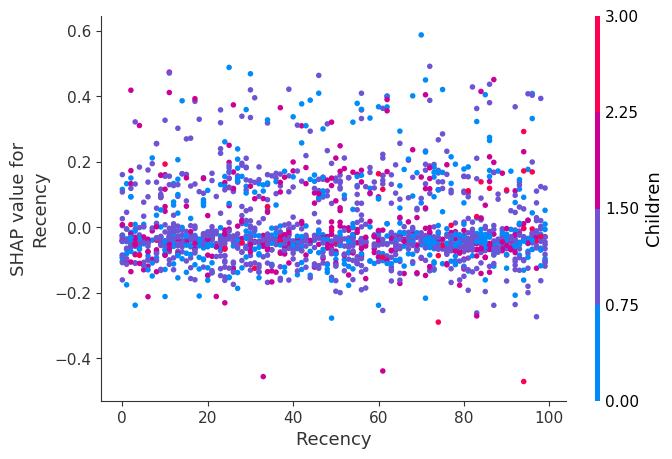

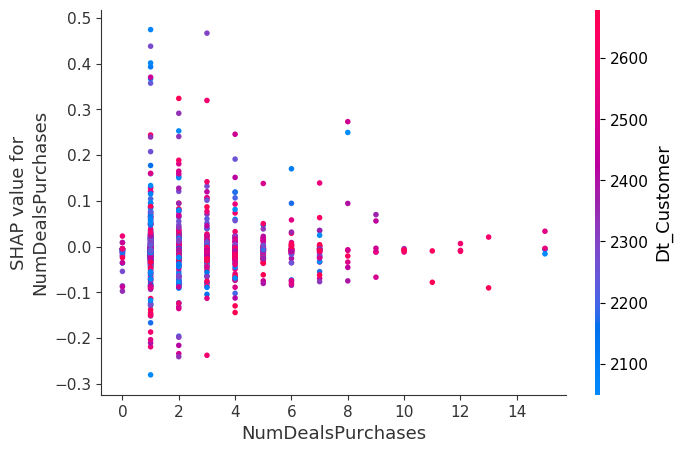

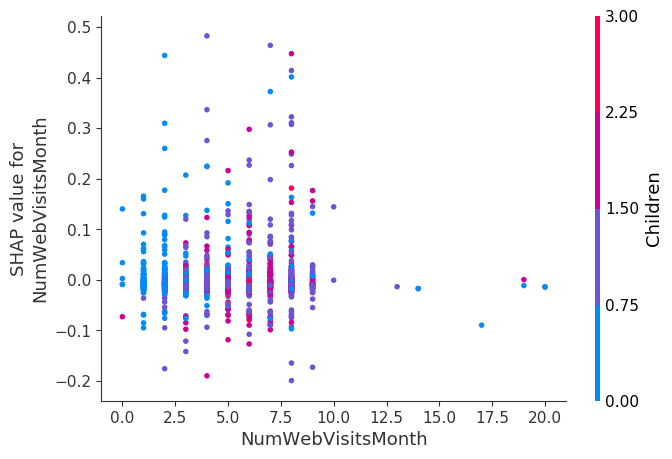

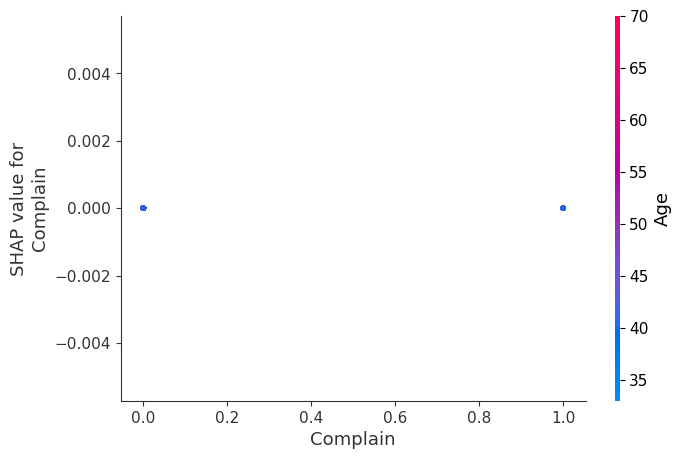

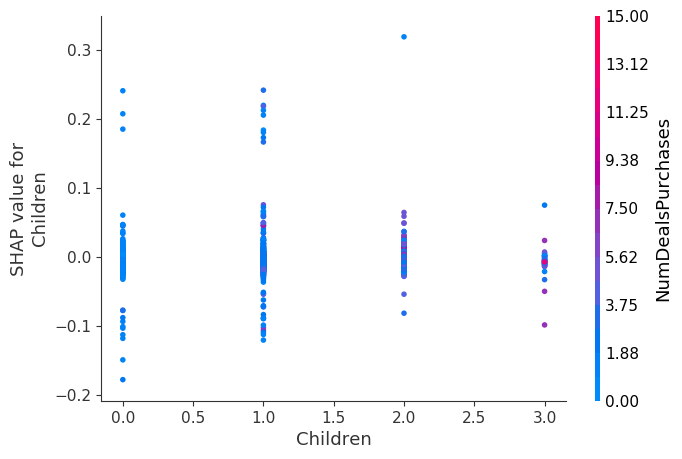

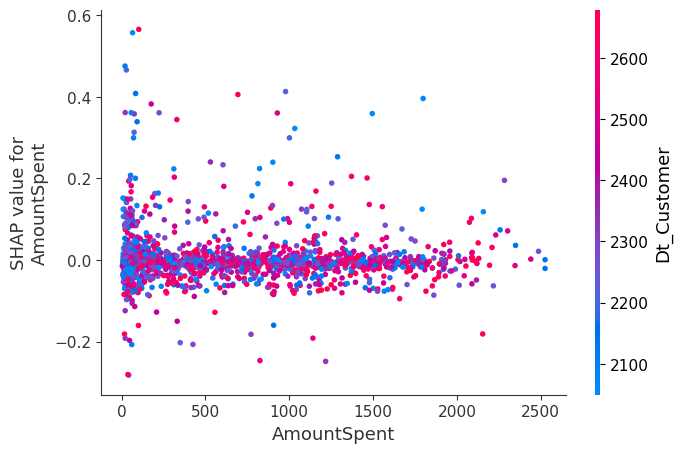

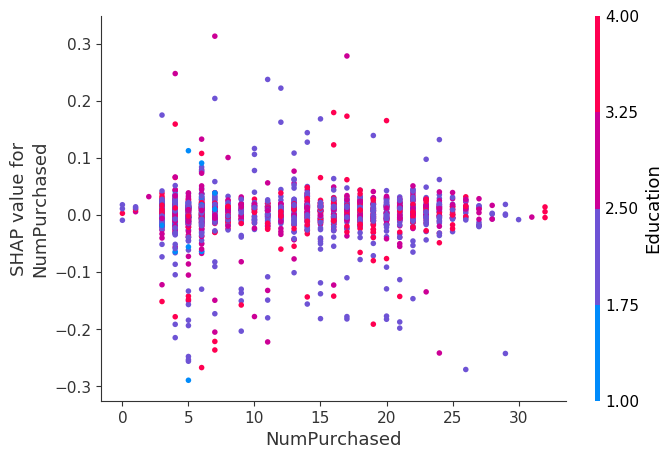

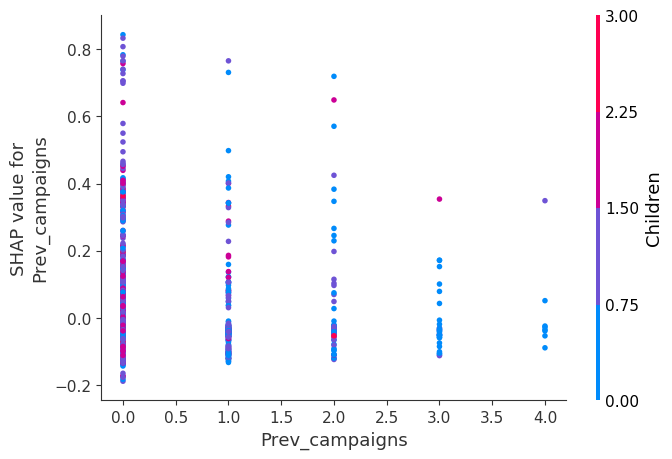

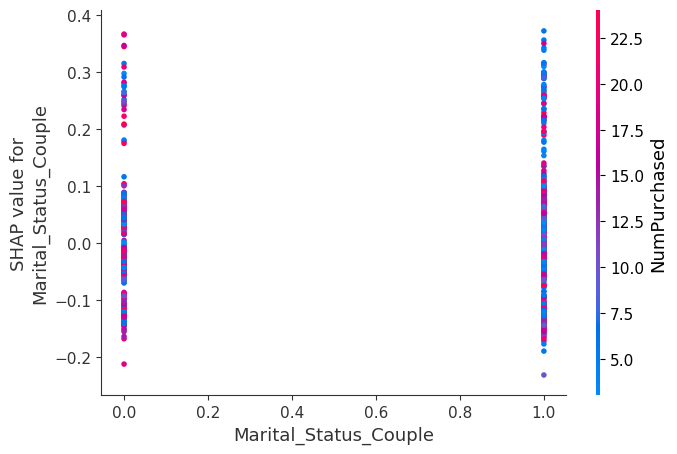

In [116]:
# SHAP partial dependence plot for a tree based model
for i in x_train.columns:
    shap.dependence_plot(i, tree_shap_values.values, x_train)

## Interpreting SHAP dependence plot for Linear and Tree-based model
The SHAP dependence plot shows the marginal effect one or two features have on the predicted outcome of a machine learning model. It tells whether the relationship between the target and a feature is linear, monotonic, or more complex. Let us interpret the linear and Tree-based models using the SHAP dependence plot. 

1. For the Linear model we can see how amount spent, recency and Income have a linear dependency on prediction.

2. The tree model shows  a very complex dependency for every feature which is difficult to interpret

# Partial Dependency Plot for Tree and Linear models

In [117]:
from sklearn.inspection import plot_partial_dependence

plot_partial_dependence(
    logreg, x_test, x_test.columns, n_jobs=3, grid_resolution=20
)

fig = plt.gcf()
fig.suptitle("Partial dependence of Marketting Features")
fig.subplots_adjust(wspace=0.4, hspace=0.8)
plt.show()
plt.rcParams["figure.figsize"] = (32, 24)

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file
libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file
libc++abi: terminating with uncaught exception of type std::runtime_error: Couldn't close file
exception calling callback for <Future at 0x297239d00 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/Users/makarandmadhavi/opt/miniconda3/lib/python3.9/site-packages/joblib/externals/loky/_base.py", line 26, in _invoke_callbacks
    callback(self)
  File "/Users/makarandmadhavi/opt/miniconda3/lib/python3.9/site-packages/joblib/parallel.py", line 385, in __call__
    self.parallel.dispatch_next()
  File "/Users/makarandmadhavi/opt/miniconda3/lib/python3.9/site-packages/joblib/parallel.

TerminatedWorkerError: ignored

Income, AmountSpent and Recency shows linear dependence which is similar to what to what we see in shap values

In [ ]:
# PDP Plot for Tree based Model
plot_partial_dependence(
    dtc, x_test, x_test.columns, n_jobs=3, grid_resolution=20
)


fig = plt.gcf()
fig.suptitle("Partial dependence of Marketting Features")
fig.subplots_adjust(wspace=0.4, hspace=0.8)
plt.show()
plt.rcParams["figure.figsize"] = (32, 24)

# Comparision between SHAP and Partial Dependence Plot Analysis
SHAP uses the black-box model to calculate the marginal contribution to the prediction for each feature and then relies on the theoretically sound game theory concept of Shapley values to calculate the feature importance. In this way

1. PDP gives the extent of effect a variable has on the output by freezing the rest of them
2. SHAP gives how much each variable contributes to the prediction

We have to analyze our needs and then consider the tradeoff to select the best suitable interpretable method for the ML model

# References
H20.ai- https://docs.h2o.ai/

OLS Model- http://net-informations.com/ds/mla/ols.html

Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

ChatGPT - https://chat.openai.com/chat

60% code is written by me with other 40% referenced and modified from various sources such as stackoverflow geeksforgeeks and ChatGPT

All code in this note is available as open source through the MIT license.

All text and images are free to use under the Creative Commons Attribution 3.0 license. https://creativecommons.org/licenses/by/3.0/us/

MIT License

Copyright (c) 2023 Makarand Madhavi

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.